In [1018]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [1019]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine_Learning/Web Projects/Laptop Price Predictor/dataset/laptop_price_2023BD_myself.csv")

In [1020]:

df.head()


,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Inch
0,Apple MacBook Air Late 2020 Apple M1 Chip 13.3...,122060 bdt,Apple Apple M1 Not Applicable Apple M1 Chip No...,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8GB,256GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 7-core GPU Integrated Shared Not Applica...,"macOS App Store, Books, Calendar, Contacts, Fa...",1.29kg,15.23253
1,Acer TravelMate TMB 311-31-C3CD 11.6 inch HD D...,nan bdt,"Intel Celeron N4020 Processor (4M Cache, 1.10 ...","11.6"" HD (1366 x 768) Display",4GB,256GB NVMe SSD,Intel UHD Graphics 600,LINUX,1.40 kg,15.23253
2,"ASUS ZenBook 14X UX5401EA Core i5 11th Gen 14""...",130900 bdt,Intel Core i5-1135G7,14 inch OLED 2.8K (2880X1800) Touch ScreenYes,8GB,M.2 NVMe PCIe 3.0 G4 SSD 512GB,Intel Iris Xe Graphics Shared,Windows 10,1.4 kg,15.23253
3,Apple Macbook Pro M2 (MNEH3) 13.3 inch Retina ...,162000 bdt,Apple M2 chip \n8-core CPU with 4 performance ...,Retina display \n13.3-inch (diagonal) LED-back...,8GB,256GB SSD,10-core GPU \n16-core Neural Engine \n100GB/s ...,macOS,1.4 kg,13.30000
4,Lenovo IdeaPad Flex 5 14ARE05 14 inch Full HD ...,91000 bdt,"AMD Ryzen 7 4700U(8C/8T,2.0GHz Upto 4.1GHz,L2-...","14"" FHD (1920x1080) IPS 250nits Glossy-45% NTS...",8GB,512GB M.2 2242 PCIe NVMe SSD,Integrated AMD Radeon Graphics,Windows 10 Home,1.5 kg,15.23253


---
### Feature Engineering...
---

In [1021]:
df.isnull().sum()

Name                0
Price               0
Cpu                 0
ScreenResolution    0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Inch                0
dtype: int64

In [1022]:
df.Price.unique

<bound method Series.unique of 0       122060  bdt
1           nan bdt
2       130900  bdt
3       162000  bdt
4        91000  bdt
           ...     
1001    135000  bdt
1002        nan bdt
1003     87000  bdt
1004    250140  bdt
1005    138600  bdt
Name: Price, Length: 1006, dtype: object>

In [1023]:
df.Price = df.Price.str.replace(" bdt", "")

df["Price"] = df["Price"].replace("nan", np.NaN)
df["Price"] = df["Price"].astype('float')

In [1024]:
df["Price"].mean()

122608.84444444445

In [1025]:
df["Price"].isnull().sum()

61

In [1026]:
df.dropna(inplace=True)

In [1027]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 945 entries, 0 to 1005
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              945 non-null    object 
 1   Price             945 non-null    float64
 2   Cpu               945 non-null    object 
 3   ScreenResolution  945 non-null    object 
 4   Ram               945 non-null    object 
 5   Memory            945 non-null    object 
 6   Gpu               945 non-null    object 
 7   OpSys             945 non-null    object 
 8   Weight            945 non-null    object 
 9   Inch              945 non-null    float64
dtypes: float64(2), object(8)
memory usage: 81.2+ KB


---
### getting Operating System name:
---

In [1028]:
df.OpSys = df.OpSys.str.replace("®", "")
df.OpSys = df.OpSys.str.replace("™", "")

In [1029]:
def extract_os(text):
  text = str(text).lower()

  if "macos" in text:
    return "macOS"
  elif "win-10" in text or "windows 10" in text or "win 10" in text or "win10" in text or "windows-10" in text:
    return "Windows 10"
  elif "win-11" in text or "windows 11" in text or "win 11" in text or "win11" in text or "windows-11" in text:
    return "Windows 11"
  elif "linux" in text or "lenux" in text:
    return "Linux"
  elif "fee dos" in text or "free dos" in text or "free-dos" in text or "freedos":
    return "Free-Dos"
  elif "windows" in text or "win" in text:
    return "other Windows"
  else:
    return text

In [1030]:
df["OpSys"].apply(lambda x : extract_os(x)).value_counts()

Windows 11    495
Windows 10    224
Free-Dos      146
macOS          69
Linux          11
Name: OpSys, dtype: int64

In [1031]:
df["OpSys"] = df["OpSys"].apply(lambda x : extract_os(x))

<AxesSubplot:>

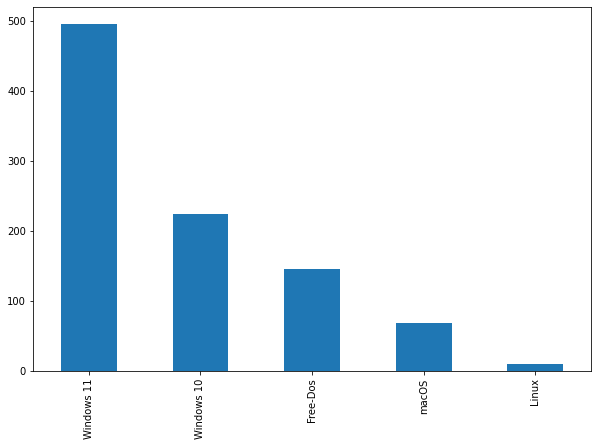

In [1032]:
plt.figure(figsize=(10, 6.7))
df["OpSys"].value_counts().plot(kind='bar')

In [1033]:
df.head()

,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Inch
0,Apple MacBook Air Late 2020 Apple M1 Chip 13.3...,122060.0,Apple Apple M1 Not Applicable Apple M1 Chip No...,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8GB,256GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 7-core GPU Integrated Shared Not Applica...,macOS,1.29kg,15.23253
2,"ASUS ZenBook 14X UX5401EA Core i5 11th Gen 14""...",130900.0,Intel Core i5-1135G7,14 inch OLED 2.8K (2880X1800) Touch ScreenYes,8GB,M.2 NVMe PCIe 3.0 G4 SSD 512GB,Intel Iris Xe Graphics Shared,Windows 10,1.4 kg,15.23253
3,Apple Macbook Pro M2 (MNEH3) 13.3 inch Retina ...,162000.0,Apple M2 chip \n8-core CPU with 4 performance ...,Retina display \n13.3-inch (diagonal) LED-back...,8GB,256GB SSD,10-core GPU \n16-core Neural Engine \n100GB/s ...,macOS,1.4 kg,13.30000
4,Lenovo IdeaPad Flex 5 14ARE05 14 inch Full HD ...,91000.0,"AMD Ryzen 7 4700U(8C/8T,2.0GHz Upto 4.1GHz,L2-...","14"" FHD (1920x1080) IPS 250nits Glossy-45% NTS...",8GB,512GB M.2 2242 PCIe NVMe SSD,Integrated AMD Radeon Graphics,Windows 10,1.5 kg,15.23253
5,Asus VivoBook Pro 15 K3500PH 15.6 inch Full HD...,119000.0,Intel Core i5-11300H Processor 3.1 GHz (8M Cac...,"15.6-inch, 400nits FHD (1920 x 1080) 16:9 aspe...",16GB,512GBM.2 NVMe PCIe 3.0 SSD,Intel Iris Xe Graphics \nNVIDIA GeForce GTX 16...,Windows 10,1.73,15.60000


In [1034]:
df["Weight"] = df["Weight"].apply(lambda x:x.replace("kg", ""))

df["Weight"] = df["Weight"].astype('float32')

---
### getting RAM as int type:
---

In [1035]:
df.Ram.unique()

array(['8GB', '16GB', '8 GB', '32GB', '4GB', '64GB ', '16GB ',
       'LPDDR4X 16GB', '16 GB', '16GB 3200MHz DDR4', '4 GB',
       '32GB DDR4 3200 MHZ SO-DIMM', '24GB',
       '8GB 3200MHZ DDR4 onboard, \nMemory Max Up to:16GB',
       '16GB (on board) LPDDR5', '64GB', '16GB 2x 8GB SO-DIMM DDR4-3200'],
      dtype=object)

In [1036]:
df["Ram"].apply(lambda x: x.replace(" 3200MHz DDR4", "").replace("LPDDR4X ", "").replace(' DDR4 3200 MHZ SO-DIMM', "").replace(' 3200MHZ DDR4 onboard, \nMemory Max Up to:16', "").replace(
    ' (on board) LPDDR5', "").replace('2x 8GB SO-DIMM DDR4-3200', "")).unique()

array(['8GB', '16GB', '8 GB', '32GB', '4GB', '64GB ', '16GB ', '16 GB',
       '4 GB', '24GB', '8GBGB', '64GB'], dtype=object)

In [1037]:
df["Ram"] = df["Ram"].apply(lambda x: x.replace(" 3200MHz DDR4", "").replace("LPDDR4X ", "").replace(' DDR4 3200 MHZ SO-DIMM', "").replace(' 3200MHZ DDR4 onboard, \nMemory Max Up to:16', "").replace(
    ' (on board) LPDDR5', "").replace('2x 8GB SO-DIMM DDR4-3200', ""))

In [1038]:
df["Ram"] = df["Ram"].apply(lambda x:x.replace("GB", ""))

df["Ram"] = df["Ram"].astype('int32')

<AxesSubplot:>

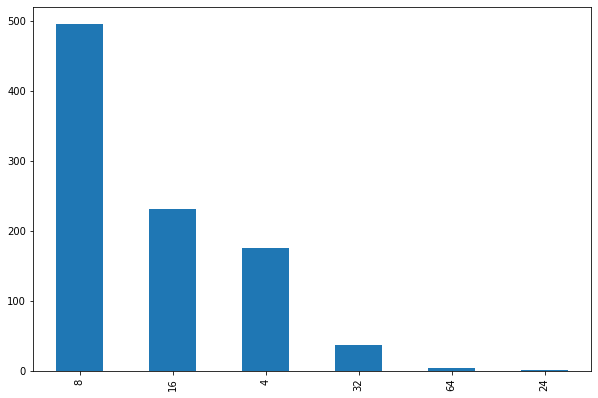

In [1039]:
plt.figure(figsize=(10, 6.7))
df["Ram"].value_counts().plot(kind='bar')

In [1040]:
df.head(2)

,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Inch
0,Apple MacBook Air Late 2020 Apple M1 Chip 13.3...,122060.0,Apple Apple M1 Not Applicable Apple M1 Chip No...,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8,256GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 7-core GPU Integrated Shared Not Applica...,macOS,1.29,15.23253
2,"ASUS ZenBook 14X UX5401EA Core i5 11th Gen 14""...",130900.0,Intel Core i5-1135G7,14 inch OLED 2.8K (2880X1800) Touch ScreenYes,8,M.2 NVMe PCIe 3.0 G4 SSD 512GB,Intel Iris Xe Graphics Shared,Windows 10,1.40,15.23253


---
### getting BRAND name:
---

In [1041]:
df["Brand"] = df["Name"].apply(lambda x : x.split()[0].title())

In [1042]:
df = df[['Brand', 'Name', 'Price', 'Cpu', 'ScreenResolution', 'Ram', 'Memory', 'Gpu',
       'OpSys', 'Weight', 'Inch']]

In [1043]:
df.head(3)

,Brand,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Inch
0,Apple,Apple MacBook Air Late 2020 Apple M1 Chip 13.3...,122060.0,Apple Apple M1 Not Applicable Apple M1 Chip No...,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8,256GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 7-core GPU Integrated Shared Not Applica...,macOS,1.29,15.23253
2,Asus,"ASUS ZenBook 14X UX5401EA Core i5 11th Gen 14""...",130900.0,Intel Core i5-1135G7,14 inch OLED 2.8K (2880X1800) Touch ScreenYes,8,M.2 NVMe PCIe 3.0 G4 SSD 512GB,Intel Iris Xe Graphics Shared,Windows 10,1.40,15.23253
3,Apple,Apple Macbook Pro M2 (MNEH3) 13.3 inch Retina ...,162000.0,Apple M2 chip \n8-core CPU with 4 performance ...,Retina display \n13.3-inch (diagonal) LED-back...,8,256GB SSD,10-core GPU \n16-core Neural Engine \n100GB/s ...,macOS,1.40,13.30000


In [1044]:
df["Price"].min(), df["Price"].max(), round(df["Price"].mean(), 2)

(30500.0, 667280.0, 122608.84)

In [1045]:
np.unique(df["Brand"], return_counts=True)

(array(['Acer', 'Apple', 'Asus', 'Dell', 'Gigabyte', 'Hp', 'Huawei',
        'Lenovo', 'Msi', 'Toshiba', 'Walton'], dtype=object),
 array([ 98,  69, 387,  75,  19,  79,  13, 130,  49,   6,  20]))

<AxesSubplot:>

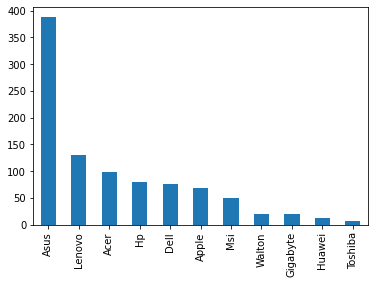

In [1046]:
df["Brand"].value_counts().plot(kind='bar')

In [1047]:
df.head(3)

,Brand,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Inch
0,Apple,Apple MacBook Air Late 2020 Apple M1 Chip 13.3...,122060.0,Apple Apple M1 Not Applicable Apple M1 Chip No...,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8,256GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 7-core GPU Integrated Shared Not Applica...,macOS,1.29,15.23253
2,Asus,"ASUS ZenBook 14X UX5401EA Core i5 11th Gen 14""...",130900.0,Intel Core i5-1135G7,14 inch OLED 2.8K (2880X1800) Touch ScreenYes,8,M.2 NVMe PCIe 3.0 G4 SSD 512GB,Intel Iris Xe Graphics Shared,Windows 10,1.40,15.23253
3,Apple,Apple Macbook Pro M2 (MNEH3) 13.3 inch Retina ...,162000.0,Apple M2 chip \n8-core CPU with 4 performance ...,Retina display \n13.3-inch (diagonal) LED-back...,8,256GB SSD,10-core GPU \n16-core Neural Engine \n100GB/s ...,macOS,1.40,13.30000


---
### getting CPU name:
---

In [1048]:
df["Cpu"] = df["Cpu"].apply(lambda x : " ".join(x.split()[:6]))

In [1049]:
df.Cpu = df.Cpu.str.replace("®", "")
df.Cpu = df.Cpu.str.replace("™", "")

In [1050]:
df

,Brand,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Inch
0,Apple,Apple MacBook Air Late 2020 Apple M1 Chip 13.3...,122060.0,Apple Apple M1 Not Applicable Apple,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8,256GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 7-core GPU Integrated Shared Not Applica...,macOS,1.29,15.23253
2,Asus,"ASUS ZenBook 14X UX5401EA Core i5 11th Gen 14""...",130900.0,Intel Core i5-1135G7,14 inch OLED 2.8K (2880X1800) Touch ScreenYes,8,M.2 NVMe PCIe 3.0 G4 SSD 512GB,Intel Iris Xe Graphics Shared,Windows 10,1.40,15.23253
3,Apple,Apple Macbook Pro M2 (MNEH3) 13.3 inch Retina ...,162000.0,Apple M2 chip 8-core CPU with,Retina display \n13.3-inch (diagonal) LED-back...,8,256GB SSD,10-core GPU \n16-core Neural Engine \n100GB/s ...,macOS,1.40,13.30000
4,Lenovo,Lenovo IdeaPad Flex 5 14ARE05 14 inch Full HD ...,91000.0,"AMD Ryzen 7 4700U(8C/8T,2.0GHz Upto 4.1GHz,L2-...","14"" FHD (1920x1080) IPS 250nits Glossy-45% NTS...",8,512GB M.2 2242 PCIe NVMe SSD,Integrated AMD Radeon Graphics,Windows 10,1.50,15.23253
5,Asus,Asus VivoBook Pro 15 K3500PH 15.6 inch Full HD...,119000.0,Intel Core i5-11300H Processor 3.1 GHz,"15.6-inch, 400nits FHD (1920 x 1080) 16:9 aspe...",16,512GBM.2 NVMe PCIe 3.0 SSD,Intel Iris Xe Graphics \nNVIDIA GeForce GTX 16...,Windows 10,1.73,15.60000
...,...,...,...,...,...,...,...,...,...,...,...
1000,Asus,ASUS ProArt Studiobook 16 OLED H5600QR Ryzen 9...,358640.0,AMD Ryzen 7 5900HX,16 Inch 4K WQUXGA OLED 3840 x 2400 Touch Scree...,32,M.2 NVME PCIE 3.0 SSD 1TB,Nvidia RTX 3070 Graphics 8GB,Windows 11,2.40,15.23253
1001,Asus,ASUS ExpertBook B5 Flip B5302FEA 13.3 inch Ful...,135000.0,Intel Core i7-1165G7 Processor 2.8 GHz,"13.3"" Touch + Flip Full HD (1920 X 1080p) 16:9...",16,512GB M.2 NVMe PCIe 3.0 SSD (Extra M.2 PCIE NV...,Intel Iris Xe Graphics,Free-Dos,1.33,15.23253
1003,Hp,HP PROBOOK 450 G8 15.6 INCH FULL HD DISPLAY CO...,87000.0,Intel Core i5-1135G7 Processor (2.4 GHz,"15.6-inch diagonal FHD anti-glare, narrow beze...",8,512 GB PCIe NVMe M.2 TLC Solid State Drive,Intel's Iris Xe graphics,Windows 10,1.74,15.60000
1004,Gigabyte,GIGABYTE AORUS 5 SE4 Core i7 12th Gen RTX 3070...,250140.0,Intel Core i7-12700H,15.6 Inch IPS FHD (1920x1080) Touch ScreenNo,16,NVMe PCIe Gen4 SSD 512GB,NVIDIA GeForce RTX 3070 8GB,Windows 11,2.30,15.60000


In [1051]:
## extra computational power consumption... ;(

# def extract_cpu_1(cpu):
#   if cpu.lower().count('apple') > 1:
#     return " ".join(cpu.split()[1:])
#   elif cpu.lower().count('intel') > 1:
#     return " ".join(cpu.split()[1:])
#   elif cpu.lower().count('amd') > 1:
#     return " ".join(cpu.split()[1:])
#   return cpu

In [1052]:
# pd.DataFrame(df["Cpu"].apply(extract_cpu_1).value_counts())

In [1053]:
# df["Cpu"] = df["Cpu"].apply(extract_cpu_1)

In [1054]:
def extract_cpu_2(cpu):
  cpu = cpu.lower()

  if "core i9" in cpu or "i9" in cpu:
    return "Intel Core i9"
  elif "core i7" in cpu or "i7" in cpu:
    return "Intel Core i7"
  elif "core i5" in cpu or "i5" in cpu:
    return "Intel Core i5"
  elif "core i3" in cpu or "i3" in cpu:
    return "Intel Core i3"
  elif "celeron" in cpu:
    return "Intel Celeron"
  elif "pentium" in cpu:
    return "Intel Pentium"
  elif "intel" in cpu:
    return "Other Intel Processor"
  elif "apple m1" in cpu:
    return "Apple M1"
  elif "apple m2" in cpu:
    return "Apple M2"
  elif "ryzen 9" in cpu:
    return "AMD Ryzen 9"
  elif "ryzen 7" in cpu:
    return "AMD Ryzen 7"
  elif "ryzen 5" in cpu:
    return "AMD Ryzen 5"
  elif "ryzen 3" in cpu:
    return "AMD Ryzen 3"
  elif "amd" in cpu or "ryzen" in cpu:
    return "Other AMD Processor"
  
  return "Other AMD Processor"

<AxesSubplot:>

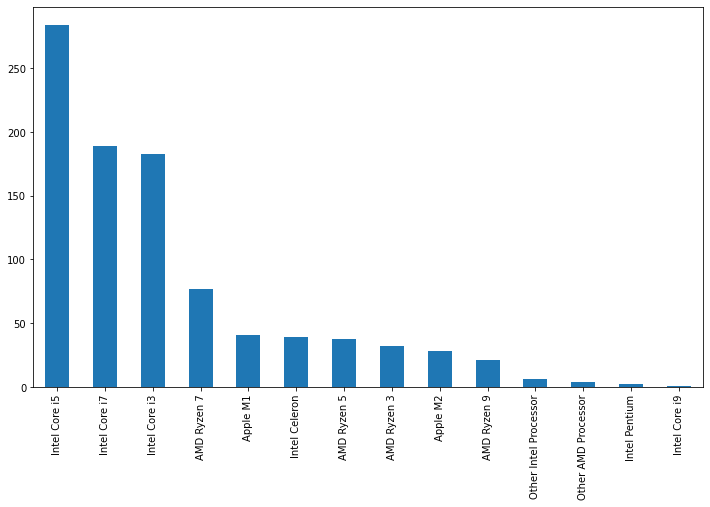

In [1055]:
plt.figure(figsize=(12, 7))
df["Cpu"].apply(extract_cpu_2).value_counts().plot(kind="bar")

In [1056]:
df["Cpu"] = df["Cpu"].apply(extract_cpu_2)

In [1057]:
df["Cpu"].unique()

array(['Apple M1', 'Intel Core i5', 'Apple M2', 'AMD Ryzen 7',
       'Intel Core i7', 'Intel Core i3', 'AMD Ryzen 9', 'Intel Celeron',
       'AMD Ryzen 5', 'Other Intel Processor', 'Intel Pentium',
       'AMD Ryzen 3', 'Other AMD Processor', 'Intel Core i9'],
      dtype=object)

In [1058]:
df.head()

,Brand,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Inch
0,Apple,Apple MacBook Air Late 2020 Apple M1 Chip 13.3...,122060.0,Apple M1,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8,256GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 7-core GPU Integrated Shared Not Applica...,macOS,1.29,15.23253
2,Asus,"ASUS ZenBook 14X UX5401EA Core i5 11th Gen 14""...",130900.0,Intel Core i5,14 inch OLED 2.8K (2880X1800) Touch ScreenYes,8,M.2 NVMe PCIe 3.0 G4 SSD 512GB,Intel Iris Xe Graphics Shared,Windows 10,1.40,15.23253
3,Apple,Apple Macbook Pro M2 (MNEH3) 13.3 inch Retina ...,162000.0,Apple M2,Retina display \n13.3-inch (diagonal) LED-back...,8,256GB SSD,10-core GPU \n16-core Neural Engine \n100GB/s ...,macOS,1.40,13.30000
4,Lenovo,Lenovo IdeaPad Flex 5 14ARE05 14 inch Full HD ...,91000.0,AMD Ryzen 7,"14"" FHD (1920x1080) IPS 250nits Glossy-45% NTS...",8,512GB M.2 2242 PCIe NVMe SSD,Integrated AMD Radeon Graphics,Windows 10,1.50,15.23253
5,Asus,Asus VivoBook Pro 15 K3500PH 15.6 inch Full HD...,119000.0,Intel Core i5,"15.6-inch, 400nits FHD (1920 x 1080) 16:9 aspe...",16,512GBM.2 NVMe PCIe 3.0 SSD,Intel Iris Xe Graphics \nNVIDIA GeForce GTX 16...,Windows 10,1.73,15.60000


---
### extract Laptop type:
---

In [1059]:
def extract_type(name):
  name = name.lower()

  if "macbook" in name:
    return "MacBook"
  elif "gaming" in name:
    return "Gaming"
  elif "zenbook" in name:
    return "ZenBook"
  elif "vivobook" in name:
    return "VivoBook"
  elif "expertbook" in name:
    return "ExpertBook / UltraBook"
  else:
    return "Notebook"

In [1060]:
df["Name"].apply(extract_type).value_counts()

Notebook                  445
VivoBook                  201
Gaming                    148
MacBook                    69
ZenBook                    51
ExpertBook / UltraBook     31
Name: Name, dtype: int64

In [1061]:
df["Type"] = df["Name"].apply(extract_type)

<AxesSubplot:>

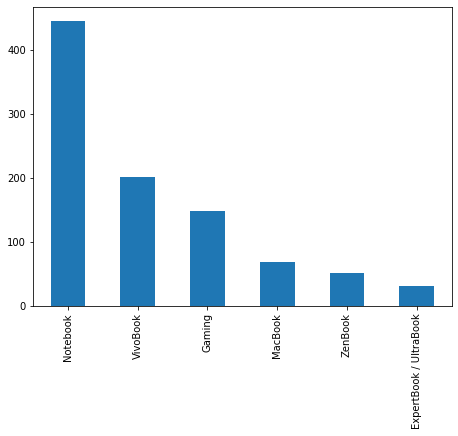

In [1062]:
plt.figure(figsize=(7.5, 5.5))
df["Type"].value_counts().plot(kind='bar')

In [1063]:
df.reset_index(drop=True, inplace=True)

In [1064]:
df.columns

Index(['Brand', 'Name', 'Price', 'Cpu', 'ScreenResolution', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight', 'Inch', 'Type'],
      dtype='object')

In [1065]:
df = df[['Brand', 'Type', 'Name', 'Price', 'Cpu', 'ScreenResolution', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight', 'Inch']]

In [1066]:
df

,Brand,Type,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Inch
0,Apple,MacBook,Apple MacBook Air Late 2020 Apple M1 Chip 13.3...,122060.0,Apple M1,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8,256GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 7-core GPU Integrated Shared Not Applica...,macOS,1.29,15.23253
1,Asus,ZenBook,"ASUS ZenBook 14X UX5401EA Core i5 11th Gen 14""...",130900.0,Intel Core i5,14 inch OLED 2.8K (2880X1800) Touch ScreenYes,8,M.2 NVMe PCIe 3.0 G4 SSD 512GB,Intel Iris Xe Graphics Shared,Windows 10,1.40,15.23253
2,Apple,MacBook,Apple Macbook Pro M2 (MNEH3) 13.3 inch Retina ...,162000.0,Apple M2,Retina display \n13.3-inch (diagonal) LED-back...,8,256GB SSD,10-core GPU \n16-core Neural Engine \n100GB/s ...,macOS,1.40,13.30000
3,Lenovo,Notebook,Lenovo IdeaPad Flex 5 14ARE05 14 inch Full HD ...,91000.0,AMD Ryzen 7,"14"" FHD (1920x1080) IPS 250nits Glossy-45% NTS...",8,512GB M.2 2242 PCIe NVMe SSD,Integrated AMD Radeon Graphics,Windows 10,1.50,15.23253
4,Asus,Gaming,Asus VivoBook Pro 15 K3500PH 15.6 inch Full HD...,119000.0,Intel Core i5,"15.6-inch, 400nits FHD (1920 x 1080) 16:9 aspe...",16,512GBM.2 NVMe PCIe 3.0 SSD,Intel Iris Xe Graphics \nNVIDIA GeForce GTX 16...,Windows 10,1.73,15.60000
...,...,...,...,...,...,...,...,...,...,...,...,...
940,Asus,Notebook,ASUS ProArt Studiobook 16 OLED H5600QR Ryzen 9...,358640.0,AMD Ryzen 7,16 Inch 4K WQUXGA OLED 3840 x 2400 Touch Scree...,32,M.2 NVME PCIE 3.0 SSD 1TB,Nvidia RTX 3070 Graphics 8GB,Windows 11,2.40,15.23253
941,Asus,ExpertBook / UltraBook,ASUS ExpertBook B5 Flip B5302FEA 13.3 inch Ful...,135000.0,Intel Core i7,"13.3"" Touch + Flip Full HD (1920 X 1080p) 16:9...",16,512GB M.2 NVMe PCIe 3.0 SSD (Extra M.2 PCIE NV...,Intel Iris Xe Graphics,Free-Dos,1.33,15.23253
942,Hp,Notebook,HP PROBOOK 450 G8 15.6 INCH FULL HD DISPLAY CO...,87000.0,Intel Core i5,"15.6-inch diagonal FHD anti-glare, narrow beze...",8,512 GB PCIe NVMe M.2 TLC Solid State Drive,Intel's Iris Xe graphics,Windows 10,1.74,15.60000
943,Gigabyte,Gaming,GIGABYTE AORUS 5 SE4 Core i7 12th Gen RTX 3070...,250140.0,Intel Core i7,15.6 Inch IPS FHD (1920x1080) Touch ScreenNo,16,NVMe PCIe Gen4 SSD 512GB,NVIDIA GeForce RTX 3070 8GB,Windows 11,2.30,15.60000


In [1067]:
import re

In [1068]:
def extract_sc_resolution(txt):
  txt = txt.lower()
  p1 = r'\d{3,4}\s*x\s*\d{3,4}'
  p2 = r'\d{3,4}\s*[*x]\s*\d{3,4}'
  p3 = r'\d{3,4}\s*×\s*\d{3,4}'

  if len(re.findall(p1, txt)) > 0:
    return re.findall(p1, txt)[0].replace(" ", "")
  elif len(re.findall(p2, txt)) > 0:
    return re.findall(p2, txt)[0].replace("*", "x").replace(" ", "")
  elif len(re.findall(p3, txt)) > 0:
    return re.findall(p3, txt)[0].replace("×", "x").replace(" ", "")
  
  return txt

In [1069]:
pd.DataFrame(df["ScreenResolution"].apply(extract_sc_resolution).value_counts())

,ScreenResolution
1920x1080,662
2560x1600,51
1366x768,37
2880x1800,27
3840x2400,21
2560x1440,20
3024x1964,18
2560x1664,12
3840x2160,11
3456x2234,10


In [1070]:
df["sc_res1"] = df["ScreenResolution"].apply(extract_sc_resolution)

In [1071]:
df.head()

,Brand,Type,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Inch,sc_res1
0,Apple,MacBook,Apple MacBook Air Late 2020 Apple M1 Chip 13.3...,122060.0,Apple M1,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8,256GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 7-core GPU Integrated Shared Not Applica...,macOS,1.29,15.23253,2560x1600
1,Asus,ZenBook,"ASUS ZenBook 14X UX5401EA Core i5 11th Gen 14""...",130900.0,Intel Core i5,14 inch OLED 2.8K (2880X1800) Touch ScreenYes,8,M.2 NVMe PCIe 3.0 G4 SSD 512GB,Intel Iris Xe Graphics Shared,Windows 10,1.40,15.23253,2880x1800
2,Apple,MacBook,Apple Macbook Pro M2 (MNEH3) 13.3 inch Retina ...,162000.0,Apple M2,Retina display \n13.3-inch (diagonal) LED-back...,8,256GB SSD,10-core GPU \n16-core Neural Engine \n100GB/s ...,macOS,1.40,13.30000,retina display \n13.3-inch (diagonal) led-back...
3,Lenovo,Notebook,Lenovo IdeaPad Flex 5 14ARE05 14 inch Full HD ...,91000.0,AMD Ryzen 7,"14"" FHD (1920x1080) IPS 250nits Glossy-45% NTS...",8,512GB M.2 2242 PCIe NVMe SSD,Integrated AMD Radeon Graphics,Windows 10,1.50,15.23253,1920x1080
4,Asus,Gaming,Asus VivoBook Pro 15 K3500PH 15.6 inch Full HD...,119000.0,Intel Core i5,"15.6-inch, 400nits FHD (1920 x 1080) 16:9 aspe...",16,512GBM.2 NVMe PCIe 3.0 SSD,Intel Iris Xe Graphics \nNVIDIA GeForce GTX 16...,Windows 10,1.73,15.60000,1920x1080


In [1072]:
df["ScreenResolution"].apply(lambda x : re.findall(r'(\d+)\s*pixels per inch', x.lower())[0] if len(re.findall(r'(\d+)\s*pixels per inch', x.lower())) > 0 else np.NaN).value_counts()

227    13
224     8
254     1
Name: ScreenResolution, dtype: int64

In [1073]:
df["ppi"] = df["ScreenResolution"].apply(lambda x : int(re.findall(r'(\d+)\s*pixels per inch', x.lower())[0]) if len(re.findall(r'(\d+)\s*pixels per inch', x.lower())) > 0 else np.NaN)   

In [1074]:
df["sc_res1"].apply(lambda x : x if len(re.findall(r'\d{3,4}\s*x\s*\d{3,4}', x)) > 0 else np.NaN)

0      2560x1600
1      2880x1800
2            NaN
3      1920x1080
4      1920x1080
         ...    
940    3840x2400
941    1920x1080
942    1920x1080
943    1920x1080
944    2560x1600
Name: sc_res1, Length: 945, dtype: object

In [1075]:
df["sc_res1"] = df["sc_res1"].apply(lambda x : x if len(re.findall(r'\d{3,4}\s*x\s*\d{3,4}', x)) > 0 else np.NaN)

In [1076]:
df.loc[(df["sc_res1"].isnull()) & (df["ppi"].isnull())]

,Brand,Type,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Inch,sc_res1,ppi
26,Lenovo,Notebook,Lenovo Note V14 14 inch HD Display Core i3 11t...,58500.0,Intel Core i3,"35.6cms (14) HD, 300 nits, antiglare",4,1 TB 5400rpm HDD \nExtra M.2 Slot512GB SSD,Intel UHD 600 Graphics,Free-Dos,1.60,15.23253,NaN,NaN
43,Lenovo,Notebook,Lenovo IdeaPad Slim 3i 15IGL 15.6 inch FULL HD...,39000.0,Intel Celeron,"15.6"" FULL HD AntiGlare LED Backlight Narrow B...",4,256GB NVMe PCIe SSD,Intel UHD Graphics 600,Windows 11,1.70,15.23253,NaN,NaN
67,Walton,Notebook,WALTON PRELUDE N5000B 14.0 INCH LED BACKLIT DI...,30500.0,Intel Pentium,"256GB SATAIII M.2 2280 SSD, SATA interface (Ex...",8,Intel UHD Graphics 605,14.0” (35.56mm) HD (1366x768)\nMatte LED Backl...,Windows 10,1.80,15.23253,NaN,NaN
85,Asus,VivoBook,ASUS VIVOBOOK S 16X S5602ZA 16.0-INCH DISPLAY ...,130000.0,Intel Core i5,16.0-inch WQXGA,8,512GB M.2 NVMe™ PCIe® 4.0 SSD,Intel Iris Xᵉ Graphics (available for Intel® C...,Windows 11,1.50,16.00000,NaN,NaN
91,Msi,Notebook,MSI Modern 14 C12M 14 inch Full HD Display Cor...,93500.0,Intel Core i7,65W adapter,8,Iris Xe Graphics,"14"" Full HD (1920 x 1080) Thin Bezel IPS-Level...",Free-Dos,1.40,15.23253,NaN,NaN
96,Asus,VivoBook,Asus VivoBook 15 S513EQ 15.6 inch OLED Full HD...,102500.0,Intel Core i5,"15.6” OLED FHD DISPLAY, 16:9, 600 NITS, 85% SC...",8,512GB M.2 NVMe PCIe 3.0 SSD,Nvidia GeForce MX350 DDR5 2GB Graphics,Windows 11,1.80,15.23253,NaN,NaN
147,Acer,Notebook,ACER TRAVELMATE TMP214-53-59FP 14 INCHES FULL ...,70000.0,Intel Core i5,14 Inches\nFull HD LED Backlit Anti-Glare Display,8,512GB SSD SATA,Intel Iris Xe Graphics,Windows 10,1.60,15.23253,NaN,NaN
163,Lenovo,Notebook,Lenovo Note V14 14 inch HD Display Core i3 11t...,58000.0,Intel Core i3,"35.6cms (14) HD, 300 nits, antiglare",8,1 TB 5400rpm HDD \nExtra M.2 Slot256GB SSD,Intel UHD 600 Graphics,Free-Dos,1.60,15.23253,NaN,NaN
178,Lenovo,Notebook,Lenovo IdeaPad 3 15IGL 15.6 inch FHD Display I...,36000.0,Other Intel Processor,"15.6"" FHD AntiGlare LED Backlight Narrow Bezel...",4,1TB HDD (EXTRA M.2 NVME PCIE SSD SLOT AVAILABLE),Intel UHD Graphics 600,Free-Dos,1.70,15.23253,NaN,NaN
205,Acer,Gaming,Acer Predator Helios 300 PH315-54-77MK 15.6 in...,185000.0,Intel Core i7,15.6-inch QHD with IPS (In-Plane Switching) te...,16,512GB PCIe NVMe Gen 4 SSD \n1TB HDD,NVIDIA GeForce RTX 3060 6GB GDDR6 Graphics,Windows 10,2.30,15.60000,NaN,NaN


In [1077]:
df.loc[(df["sc_res1"].isnull()) & (df["ppi"].isnull())].index

Int64Index([ 26,  43,  67,  85,  91,  96, 147, 163, 178, 205, 233, 247, 263,
            307, 337, 387, 416, 439, 443, 456, 462, 520, 558, 635, 648, 683,
            701, 716, 720, 721, 835, 842, 852, 854, 859, 872],
           dtype='int64')

In [1078]:
nulls = df.loc[(df["sc_res1"].isnull()) & (df["ppi"].isnull())].copy()

In [1079]:
nulls

,Brand,Type,Name,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Inch,sc_res1,ppi
26,Lenovo,Notebook,Lenovo Note V14 14 inch HD Display Core i3 11t...,58500.0,Intel Core i3,"35.6cms (14) HD, 300 nits, antiglare",4,1 TB 5400rpm HDD \nExtra M.2 Slot512GB SSD,Intel UHD 600 Graphics,Free-Dos,1.60,15.23253,NaN,NaN
43,Lenovo,Notebook,Lenovo IdeaPad Slim 3i 15IGL 15.6 inch FULL HD...,39000.0,Intel Celeron,"15.6"" FULL HD AntiGlare LED Backlight Narrow B...",4,256GB NVMe PCIe SSD,Intel UHD Graphics 600,Windows 11,1.70,15.23253,NaN,NaN
67,Walton,Notebook,WALTON PRELUDE N5000B 14.0 INCH LED BACKLIT DI...,30500.0,Intel Pentium,"256GB SATAIII M.2 2280 SSD, SATA interface (Ex...",8,Intel UHD Graphics 605,14.0” (35.56mm) HD (1366x768)\nMatte LED Backl...,Windows 10,1.80,15.23253,NaN,NaN
85,Asus,VivoBook,ASUS VIVOBOOK S 16X S5602ZA 16.0-INCH DISPLAY ...,130000.0,Intel Core i5,16.0-inch WQXGA,8,512GB M.2 NVMe™ PCIe® 4.0 SSD,Intel Iris Xᵉ Graphics (available for Intel® C...,Windows 11,1.50,16.00000,NaN,NaN
91,Msi,Notebook,MSI Modern 14 C12M 14 inch Full HD Display Cor...,93500.0,Intel Core i7,65W adapter,8,Iris Xe Graphics,"14"" Full HD (1920 x 1080) Thin Bezel IPS-Level...",Free-Dos,1.40,15.23253,NaN,NaN
96,Asus,VivoBook,Asus VivoBook 15 S513EQ 15.6 inch OLED Full HD...,102500.0,Intel Core i5,"15.6” OLED FHD DISPLAY, 16:9, 600 NITS, 85% SC...",8,512GB M.2 NVMe PCIe 3.0 SSD,Nvidia GeForce MX350 DDR5 2GB Graphics,Windows 11,1.80,15.23253,NaN,NaN
147,Acer,Notebook,ACER TRAVELMATE TMP214-53-59FP 14 INCHES FULL ...,70000.0,Intel Core i5,14 Inches\nFull HD LED Backlit Anti-Glare Display,8,512GB SSD SATA,Intel Iris Xe Graphics,Windows 10,1.60,15.23253,NaN,NaN
163,Lenovo,Notebook,Lenovo Note V14 14 inch HD Display Core i3 11t...,58000.0,Intel Core i3,"35.6cms (14) HD, 300 nits, antiglare",8,1 TB 5400rpm HDD \nExtra M.2 Slot256GB SSD,Intel UHD 600 Graphics,Free-Dos,1.60,15.23253,NaN,NaN
178,Lenovo,Notebook,Lenovo IdeaPad 3 15IGL 15.6 inch FHD Display I...,36000.0,Other Intel Processor,"15.6"" FHD AntiGlare LED Backlight Narrow Bezel...",4,1TB HDD (EXTRA M.2 NVME PCIE SSD SLOT AVAILABLE),Intel UHD Graphics 600,Free-Dos,1.70,15.23253,NaN,NaN
205,Acer,Gaming,Acer Predator Helios 300 PH315-54-77MK 15.6 in...,185000.0,Intel Core i7,15.6-inch QHD with IPS (In-Plane Switching) te...,16,512GB PCIe NVMe Gen 4 SSD \n1TB HDD,NVIDIA GeForce RTX 3060 6GB GDDR6 Graphics,Windows 10,2.30,15.60000,NaN,NaN


In [1080]:
from scipy import stats

In [1081]:
stats.mode(df["sc_res1"])

ModeResult(mode=array(['1920x1080'], dtype=object), count=array([662]))

In [1082]:
nulls["sc_res1"] = nulls["sc_res1"].replace(np.NaN, "1920x1080")

In [1083]:
df.drop(index=[ 26,  43,  67,  85,  91,  96, 147, 163, 178, 205, 233, 247, 263,
            307, 337, 387, 416, 439, 443, 456, 462, 520, 558, 635, 648, 683,
            701, 716, 720, 721, 835, 842, 852, 854, 859, 872], inplace=True)

In [1084]:
df = pd.concat((df, nulls), axis=0).reset_index(drop=True)

In [1085]:
df.keys()

Index(['Brand', 'Type', 'Name', 'Price', 'Cpu', 'ScreenResolution', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Inch', 'sc_res1', 'ppi'],
      dtype='object')

In [1086]:
df = df[['Brand', 'Type', 'Price', 'Cpu', 'ScreenResolution', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Inch', 'sc_res1', 'ppi']]

In [1087]:
df

,Brand,Type,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Inch,sc_res1,ppi
0,Apple,MacBook,122060.0,Apple M1,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8,256GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 7-core GPU Integrated Shared Not Applica...,macOS,1.29,15.23253,2560x1600,NaN
1,Asus,ZenBook,130900.0,Intel Core i5,14 inch OLED 2.8K (2880X1800) Touch ScreenYes,8,M.2 NVMe PCIe 3.0 G4 SSD 512GB,Intel Iris Xe Graphics Shared,Windows 10,1.40,15.23253,2880x1800,NaN
2,Apple,MacBook,162000.0,Apple M2,Retina display \n13.3-inch (diagonal) LED-back...,8,256GB SSD,10-core GPU \n16-core Neural Engine \n100GB/s ...,macOS,1.40,13.30000,NaN,227.0
3,Lenovo,Notebook,91000.0,AMD Ryzen 7,"14"" FHD (1920x1080) IPS 250nits Glossy-45% NTS...",8,512GB M.2 2242 PCIe NVMe SSD,Integrated AMD Radeon Graphics,Windows 10,1.50,15.23253,1920x1080,NaN
4,Asus,Gaming,119000.0,Intel Core i5,"15.6-inch, 400nits FHD (1920 x 1080) 16:9 aspe...",16,512GBM.2 NVMe PCIe 3.0 SSD,Intel Iris Xe Graphics \nNVIDIA GeForce GTX 16...,Windows 10,1.73,15.60000,1920x1080,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,Asus,VivoBook,47000.0,Intel Celeron,512GB M.2 NVMe PCIe 3.0 SSD,4,Intel UHD Graphics 600,"14.0-inch, FHD (1920 x 1080) 16:9 aspect ratio...",Free-Dos,1.30,15.23253,1920x1080,NaN
941,Msi,Notebook,90000.0,Intel Core i5,65W adapter,16,Iris Xe Graphics,"15.6"" FHD (1920*1080), 60Hz 45%NTSC IPS-Level",Free-Dos,1.70,15.23253,1920x1080,NaN
942,Lenovo,Notebook,56500.0,Intel Core i3,"35.6cms (14) HD, 300 nits, antiglare",4,1 TB 5400rpm HDD \nExtra M.2 Slot256GB SSD,Intel UHD 600 Graphics,Free-Dos,1.60,15.23253,1920x1080,NaN
943,Asus,VivoBook,83000.0,Intel Core i5,512GB M.2 NVMe PCIe 3.0 SSD,8,Integrated Intel IRIS Xe Graphics,"15.6-inch,FHD (1920 x 1080) 16:9,IPS-level Pan...",Free-Dos,1.80,15.23253,1920x1080,NaN


In [1088]:
# ppi_only df[df["sc_res1"].isnull()].copy()

In [1089]:
df["sc_res1"].unique()

array(['2560x1600', '2880x1800', nan, '1920x1080', '3456x2234',
       '3024x1964', '2560x1440', '3840x2160', '3840x2400', '2240x1400',
       '1920x1200', '2560x1920', '1366x768', '1280x720', '2560x1664',
       '1360x768', '366x768', '1280x800', '1920x1280'], dtype=object)

In [1090]:
df["X_res"] = df[df["sc_res1"].notnull()]["sc_res1"].apply(lambda x : x.split("x")[0])
df["Y_res"] = df[df["sc_res1"].notnull()]["sc_res1"].apply(lambda x : x.split("x")[1])

In [1091]:
df["X_res"] = df["X_res"].astype('float')
df["Y_res"] = df["Y_res"].astype('float')

In [1092]:
df.drop('sc_res1', axis=1, inplace=True)
df.head()

,Brand,Type,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Inch,ppi,X_res,Y_res
0,Apple,MacBook,122060.0,Apple M1,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8,256GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 7-core GPU Integrated Shared Not Applica...,macOS,1.29,15.23253,NaN,2560.0,1600.0
1,Asus,ZenBook,130900.0,Intel Core i5,14 inch OLED 2.8K (2880X1800) Touch ScreenYes,8,M.2 NVMe PCIe 3.0 G4 SSD 512GB,Intel Iris Xe Graphics Shared,Windows 10,1.40,15.23253,NaN,2880.0,1800.0
2,Apple,MacBook,162000.0,Apple M2,Retina display \n13.3-inch (diagonal) LED-back...,8,256GB SSD,10-core GPU \n16-core Neural Engine \n100GB/s ...,macOS,1.40,13.30000,227.0,NaN,NaN
3,Lenovo,Notebook,91000.0,AMD Ryzen 7,"14"" FHD (1920x1080) IPS 250nits Glossy-45% NTS...",8,512GB M.2 2242 PCIe NVMe SSD,Integrated AMD Radeon Graphics,Windows 10,1.50,15.23253,NaN,1920.0,1080.0
4,Asus,Gaming,119000.0,Intel Core i5,"15.6-inch, 400nits FHD (1920 x 1080) 16:9 aspe...",16,512GBM.2 NVMe PCIe 3.0 SSD,Intel Iris Xe Graphics \nNVIDIA GeForce GTX 16...,Windows 10,1.73,15.60000,NaN,1920.0,1080.0


In [1093]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             945 non-null    object 
 1   Type              945 non-null    object 
 2   Price             945 non-null    float64
 3   Cpu               945 non-null    object 
 4   ScreenResolution  945 non-null    object 
 5   Ram               945 non-null    int32  
 6   Memory            945 non-null    object 
 7   Gpu               945 non-null    object 
 8   OpSys             945 non-null    object 
 9   Weight            945 non-null    float32
 10  Inch              945 non-null    float64
 11  ppi               22 non-null     float64
 12  X_res             934 non-null    float64
 13  Y_res             934 non-null    float64
dtypes: float32(1), float64(5), int32(1), object(7)
memory usage: 96.1+ KB


<AxesSubplot:>

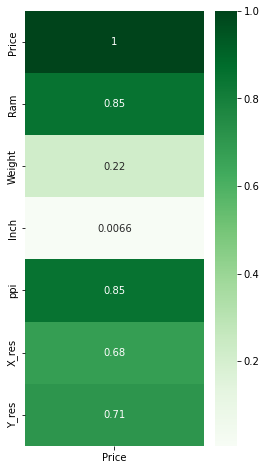

In [1094]:
plt.figure(figsize=(4, 8))
sns.heatmap(df.corr()[["Price"]], annot=True, cmap=plt.cm.Greens)

---
#### here, X_res and Y_res are highly inter co-related. which can confuse the Model. so can generate PPI (Pixel Per Inch) hybrid feature here..... ;)

In [1095]:
df[df["ppi"].isnull()]

,Brand,Type,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Inch,ppi,X_res,Y_res
0,Apple,MacBook,122060.0,Apple M1,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8,256GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 7-core GPU Integrated Shared Not Applica...,macOS,1.29,15.23253,NaN,2560.0,1600.0
1,Asus,ZenBook,130900.0,Intel Core i5,14 inch OLED 2.8K (2880X1800) Touch ScreenYes,8,M.2 NVMe PCIe 3.0 G4 SSD 512GB,Intel Iris Xe Graphics Shared,Windows 10,1.40,15.23253,NaN,2880.0,1800.0
3,Lenovo,Notebook,91000.0,AMD Ryzen 7,"14"" FHD (1920x1080) IPS 250nits Glossy-45% NTS...",8,512GB M.2 2242 PCIe NVMe SSD,Integrated AMD Radeon Graphics,Windows 10,1.50,15.23253,NaN,1920.0,1080.0
4,Asus,Gaming,119000.0,Intel Core i5,"15.6-inch, 400nits FHD (1920 x 1080) 16:9 aspe...",16,512GBM.2 NVMe PCIe 3.0 SSD,Intel Iris Xe Graphics \nNVIDIA GeForce GTX 16...,Windows 10,1.73,15.60000,NaN,1920.0,1080.0
5,Asus,VivoBook,121520.0,Intel Core i5,15.6 FHD Full HD 1920x1080 Anti-Glare No Not S...,8,512GB SSD No HDD No HDD No NVMe PCIe No Instal...,Nvidia MX350 Graphics Dedicated 2GB GDDR5,Windows 11,1.80,15.23253,NaN,1920.0,1080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,Asus,VivoBook,47000.0,Intel Celeron,512GB M.2 NVMe PCIe 3.0 SSD,4,Intel UHD Graphics 600,"14.0-inch, FHD (1920 x 1080) 16:9 aspect ratio...",Free-Dos,1.30,15.23253,NaN,1920.0,1080.0
941,Msi,Notebook,90000.0,Intel Core i5,65W adapter,16,Iris Xe Graphics,"15.6"" FHD (1920*1080), 60Hz 45%NTSC IPS-Level",Free-Dos,1.70,15.23253,NaN,1920.0,1080.0
942,Lenovo,Notebook,56500.0,Intel Core i3,"35.6cms (14) HD, 300 nits, antiglare",4,1 TB 5400rpm HDD \nExtra M.2 Slot256GB SSD,Intel UHD 600 Graphics,Free-Dos,1.60,15.23253,NaN,1920.0,1080.0
943,Asus,VivoBook,83000.0,Intel Core i5,512GB M.2 NVMe PCIe 3.0 SSD,8,Integrated Intel IRIS Xe Graphics,"15.6-inch,FHD (1920 x 1080) 16:9,IPS-level Pan...",Free-Dos,1.80,15.23253,NaN,1920.0,1080.0


---
### getting Hybrid feature PPI (pixel per inch)...
---

In [1096]:
df1 = df[df["ppi"].notnull()]

df1.shape

(22, 14)

In [1097]:
df2 = df[df["ppi"].isnull()]

df2.shape

(923, 14)

In [1098]:
df2.head()

,Brand,Type,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Inch,ppi,X_res,Y_res
0,Apple,MacBook,122060.0,Apple M1,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8,256GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 7-core GPU Integrated Shared Not Applica...,macOS,1.29,15.23253,NaN,2560.0,1600.0
1,Asus,ZenBook,130900.0,Intel Core i5,14 inch OLED 2.8K (2880X1800) Touch ScreenYes,8,M.2 NVMe PCIe 3.0 G4 SSD 512GB,Intel Iris Xe Graphics Shared,Windows 10,1.40,15.23253,NaN,2880.0,1800.0
3,Lenovo,Notebook,91000.0,AMD Ryzen 7,"14"" FHD (1920x1080) IPS 250nits Glossy-45% NTS...",8,512GB M.2 2242 PCIe NVMe SSD,Integrated AMD Radeon Graphics,Windows 10,1.50,15.23253,NaN,1920.0,1080.0
4,Asus,Gaming,119000.0,Intel Core i5,"15.6-inch, 400nits FHD (1920 x 1080) 16:9 aspe...",16,512GBM.2 NVMe PCIe 3.0 SSD,Intel Iris Xe Graphics \nNVIDIA GeForce GTX 16...,Windows 10,1.73,15.60000,NaN,1920.0,1080.0
5,Asus,VivoBook,121520.0,Intel Core i5,15.6 FHD Full HD 1920x1080 Anti-Glare No Not S...,8,512GB SSD No HDD No HDD No NVMe PCIe No Instal...,Nvidia MX350 Graphics Dedicated 2GB GDDR5,Windows 11,1.80,15.23253,NaN,1920.0,1080.0


In [1099]:
df2["ppi"] = ((df2["X_res"] ** 2) + (df2["Y_res"] ** 2)) ** 0.5 / df2["Inch"]

In [1100]:
df2.head()

,Brand,Type,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Inch,ppi,X_res,Y_res
0,Apple,MacBook,122060.0,Apple M1,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8,256GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 7-core GPU Integrated Shared Not Applica...,macOS,1.29,15.23253,198.185983,2560.0,1600.0
1,Asus,ZenBook,130900.0,Intel Core i5,14 inch OLED 2.8K (2880X1800) Touch ScreenYes,8,M.2 NVMe PCIe 3.0 G4 SSD 512GB,Intel Iris Xe Graphics Shared,Windows 10,1.40,15.23253,222.959231,2880.0,1800.0
3,Lenovo,Notebook,91000.0,AMD Ryzen 7,"14"" FHD (1920x1080) IPS 250nits Glossy-45% NTS...",8,512GB M.2 2242 PCIe NVMe SSD,Integrated AMD Radeon Graphics,Windows 10,1.50,15.23253,144.618599,1920.0,1080.0
4,Asus,Gaming,119000.0,Intel Core i5,"15.6-inch, 400nits FHD (1920 x 1080) 16:9 aspe...",16,512GBM.2 NVMe PCIe 3.0 SSD,Intel Iris Xe Graphics \nNVIDIA GeForce GTX 16...,Windows 10,1.73,15.60000,141.211998,1920.0,1080.0
5,Asus,VivoBook,121520.0,Intel Core i5,15.6 FHD Full HD 1920x1080 Anti-Glare No Not S...,8,512GB SSD No HDD No HDD No NVMe PCIe No Instal...,Nvidia MX350 Graphics Dedicated 2GB GDDR5,Windows 11,1.80,15.23253,144.618599,1920.0,1080.0


In [1101]:
df = pd.concat((df2, df1), axis=0).reset_index(drop=True)

In [1102]:
del df1
del df2

In [1103]:
del nulls

In [1104]:
df.head()

,Brand,Type,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Inch,ppi,X_res,Y_res
0,Apple,MacBook,122060.0,Apple M1,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8,256GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 7-core GPU Integrated Shared Not Applica...,macOS,1.29,15.23253,198.185983,2560.0,1600.0
1,Asus,ZenBook,130900.0,Intel Core i5,14 inch OLED 2.8K (2880X1800) Touch ScreenYes,8,M.2 NVMe PCIe 3.0 G4 SSD 512GB,Intel Iris Xe Graphics Shared,Windows 10,1.40,15.23253,222.959231,2880.0,1800.0
2,Lenovo,Notebook,91000.0,AMD Ryzen 7,"14"" FHD (1920x1080) IPS 250nits Glossy-45% NTS...",8,512GB M.2 2242 PCIe NVMe SSD,Integrated AMD Radeon Graphics,Windows 10,1.50,15.23253,144.618599,1920.0,1080.0
3,Asus,Gaming,119000.0,Intel Core i5,"15.6-inch, 400nits FHD (1920 x 1080) 16:9 aspe...",16,512GBM.2 NVMe PCIe 3.0 SSD,Intel Iris Xe Graphics \nNVIDIA GeForce GTX 16...,Windows 10,1.73,15.60000,141.211998,1920.0,1080.0
4,Asus,VivoBook,121520.0,Intel Core i5,15.6 FHD Full HD 1920x1080 Anti-Glare No Not S...,8,512GB SSD No HDD No HDD No NVMe PCIe No Instal...,Nvidia MX350 Graphics Dedicated 2GB GDDR5,Windows 11,1.80,15.23253,144.618599,1920.0,1080.0


In [1105]:
df.drop(["Inch", "X_res", "Y_res"], axis=1, inplace=True)

In [1106]:
df.head()

,Brand,Type,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,ppi
0,Apple,MacBook,122060.0,Apple M1,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8,256GB SSD No HDD No HDD No NVMe PCIe No Instal...,Apple 7-core GPU Integrated Shared Not Applica...,macOS,1.29,198.185983
1,Asus,ZenBook,130900.0,Intel Core i5,14 inch OLED 2.8K (2880X1800) Touch ScreenYes,8,M.2 NVMe PCIe 3.0 G4 SSD 512GB,Intel Iris Xe Graphics Shared,Windows 10,1.40,222.959231
2,Lenovo,Notebook,91000.0,AMD Ryzen 7,"14"" FHD (1920x1080) IPS 250nits Glossy-45% NTS...",8,512GB M.2 2242 PCIe NVMe SSD,Integrated AMD Radeon Graphics,Windows 10,1.50,144.618599
3,Asus,Gaming,119000.0,Intel Core i5,"15.6-inch, 400nits FHD (1920 x 1080) 16:9 aspe...",16,512GBM.2 NVMe PCIe 3.0 SSD,Intel Iris Xe Graphics \nNVIDIA GeForce GTX 16...,Windows 10,1.73,141.211998
4,Asus,VivoBook,121520.0,Intel Core i5,15.6 FHD Full HD 1920x1080 Anti-Glare No Not S...,8,512GB SSD No HDD No HDD No NVMe PCIe No Instal...,Nvidia MX350 Graphics Dedicated 2GB GDDR5,Windows 11,1.80,144.618599


<AxesSubplot:>

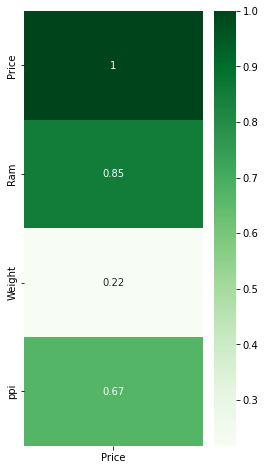

In [1107]:
plt.figure(figsize=(4, 8))
sns.heatmap(df.corr()[["Price"]], annot=True, cmap=plt.cm.Greens)

---
### getting storage memory...
---

In [1108]:
pd.DataFrame(df["Memory"].value_counts())

,Memory
512GB SSD No HDD No HDD Not Specified NVMe PCIe Not Specified Not Specified,34
512GB M.2 NVMe PCIe 3.0 SSD,32
512GB SSD No HDD No HDD No NVMe PCIe No Installed SSD can be upgradeable,27
M.2 NVMe PCIe 3.0 SSD 512GB,20
512GB SSD No HDD No HDD Not Specified NVMe PCIe Not Specified Installed SSD can be upgradeable,17
...,...
512GB PCI-E G3 SSD (Extra Hard Disk Slot Available),1
Total Solid State Drive Capacity: 512GB\nSolid State Drive Interface: PCIe NVMe Gen4,1
SATA HDD 1 TB,1
512GB NVMe PCle SSD,1


In [1109]:
hdd_plus_ssd = df[df["Memory"].apply(lambda x : True if "+" in x else False)]

In [1110]:
hdd_plus_ssd.head()

,Brand,Type,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,ppi
41,Acer,Gaming,180110.0,Intel Core i7,15.6 FHD Full HD 1920x1080 Anti-Glare No 144 H...,16,1TB HDD+256GB SSD SATA 7200 RPM Not Specified ...,Nvidia RTX 2060 Graphics Dedicated 6GB GDDR6,Windows 10,2.5,144.618599
65,Acer,Gaming,198060.0,Intel Core i7,15.6 Inch IPS Full HD (1920 x 1080) Refresh Ra...,16,PCIe NVMe Gen 4 SSD+ SATA HDD 512GB SSD + 1TB ...,NVIDIA GeForce RTX 3060 6GB,Windows 11,2.5,141.211998
70,Lenovo,Gaming,145390.0,Intel Core i7,15.6 FHD IPS LED Display Full HD 1920x1080 Ant...,16,1TB HDD+256GB SSD SATA 5400 RPM No NVMe PCIe N...,Nvidia GTX 1650 Graphics Dedicated 4GB GDDR6,Windows 11,2.2,144.618599
89,Acer,Gaming,247500.0,Intel Core i7,15.6 Inch IPS FHD (1920 x 1080) Touch ScreenNo,32,PCIe NVMe Gen 4 SSD+ SATA HDD 512GB SSD + 1TB ...,NVIDIA GeForce RTX 3070 8GB,Windows 11,2.5,141.211998
113,Lenovo,Notebook,58590.0,Intel Core i3,14 HD LED Up to HD 1366x768 Anti-Glare No 60 H...,8,1TB HDD+256GB SSD SATA Not Specified No NVMe P...,Intel UHD Graphics Integrated Shared Not Appli...,Free-Dos,1.5,102.878040


In [1111]:
hdd_plus_ssd.index

Int64Index([ 41,  65,  70,  89, 113, 177, 190, 278, 341, 348, 354, 437, 557,
            564, 609, 632, 677, 713, 721, 725, 750, 759, 802],
           dtype='int64')

In [1112]:
df.drop(index=hdd_plus_ssd.index, inplace=True)

In [1113]:
df.reset_index(drop=True, inplace=True)

In [1114]:
def extract_storage(txt):
  p1 = r"(\d+(?:\.\d+)?)\s*(?:GB|TB)\s*(M\.2|NVME|SSD|HDD)?"
  p2 = r"(M\.2|NVME|SSD|HDD)?\s*(\d+(\.\d+)?)\s*(GB|TB)\s"

  if len(re.findall(p1, txt.upper())) > 0:
    f1 = " ".join(re.findall(p1, txt.upper())[0]).strip()
    return f1 + " SSD" if f1 == "512" or f1 == "256" or f1 == "128" else f1
  elif len(re.findall(p2, txt.upper())) > 0:
    m = re.findall(p2, txt.upper())[0]
    f1 = " ".join(m[1:]) + " " + m[0].strip()
    return f1 + " SSD" if f1 == "512" or f1 == "256" or f1 == "128" else f1
  else:
    return np.NaN

In [1115]:
df["Memory"].apply(extract_storage).str.replace("1 ", "1000 ").value_counts()

512 SSD      436
512 M.2      103
1            100
1000 HDD      78
256 SSD       72
1000 SSD      57
512 NVME      18
256 M.2       10
1000 M.2      10
1000 NVME     10
8              3
2              3
128 M.2        3
128 SSD        3
256 NVME       2
2 SSD          2
16             2
4 SSD          2
1536 SSD       1
Name: Memory, dtype: int64

In [1116]:
df["Memory"] = df["Memory"].apply(extract_storage).str.replace("1 ", "1000 ")

In [1117]:
pd.DataFrame(df["Memory"].value_counts())

,Memory
512 SSD,436
512 M.2,103
1,100
1000 HDD,78
256 SSD,72
1000 SSD,57
512 NVME,18
256 M.2,10
1000 M.2,10
1000 NVME,10


In [1118]:
# df[df["Memory"] == "1"].index

df.replace("1", "1000 HDD", inplace=True)

In [1119]:
df["Memory"].value_counts()

512 SSD      436
1000 HDD     178
512 M.2      103
256 SSD       72
1000 SSD      57
512 NVME      18
256 M.2       10
1000 M.2      10
1000 NVME     10
8              3
2              3
128 SSD        3
128 M.2        3
256 NVME       2
2 SSD          2
4 SSD          2
16             2
1536 SSD       1
Name: Memory, dtype: int64

In [1120]:
df.loc[(df["Memory"] == "8") | (df["Memory"] == "2") | (df["Memory"] == "2 SSD") | (df["Memory"] == "4 SSD") | (df["Memory"] == "16") | (df["Memory"] == "1536 SSD")]

,Brand,Type,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,ppi
25,Asus,Notebook,410000.0,Intel Core i7,18.4 Inch (16:9) LED backlit UHD (3840x2160) A...,64,1536 SSD,NVIDIA GeForce GTX 1080 SLI with 16GB VRAM,Windows 10,5.70,239.446432
46,Acer,Gaming,160080.0,AMD Ryzen 5,15.6 Inch IPS QHD (2560 x 1440) Touch ScreenNo,8,16,NVIDIA GeForce RTX 3050 4GB,Windows 11,2.50,188.282664
247,Acer,Gaming,231690.0,Intel Core i7,15.6 Inch IPS QHD (2560 x 1440) Touch ScreenNo,16,16,NVIDIA GeForce RTX 3060 6GB,Windows 11,2.50,188.282664
339,Apple,MacBook,341780.0,Apple M2,13.6 Liquid Retina QHD 2560x1664 Glossy No 60 ...,24,2 SSD,Apple 10-Core GPU Integrated Shared Not Applic...,macOS,1.24,200.444460
454,Apple,MacBook,341780.0,Apple M2,13.6 Liquid Retina QHD 2560x1664 Glossy No 60 ...,24,2 SSD,Apple 10-Core GPU Integrated Shared Not Applic...,macOS,1.24,200.444460
462,Asus,Notebook,630000.0,AMD Ryzen 9,ROG Nebula HDR Display :\n16-inch \nQHD+ 16:10...,64,2,NVIDIA® GeForce RTX™ 3080 Ti Laptop GPU \nROG ...,Windows 11,2.55,198.185983
508,Acer,Gaming,99860.0,AMD Ryzen 5,15.6 Inch IPS Full HD (1920 x 1080) Touch Scre...,8,8,NVIDIA GeForce GTX 1650 4GB,Windows 11,2.15,141.211998
545,Apple,MacBook,667280.0,Apple M1,16.2 Liquid Retina XDR Display QHD 3456x2234 G...,64,4 SSD,Apple 32-Core GPU Integrated Shared Not Applic...,macOS,2.20,270.157237
599,Apple,MacBook,667280.0,Apple M1,16.2 Liquid Retina XDR Display QHD 3456x2234 G...,64,4 SSD,Apple 32-Core GPU Integrated Shared Not Applic...,macOS,2.20,270.157237
693,Acer,Gaming,119940.0,Intel Core i5,15.6 Inch IPS Full HD (1920 x 1080) Touch Scre...,8,8,NVIDIA GeForce RTX 3050 4GB,Windows 11,2.10,141.211998


In [1121]:
df.loc[(df["Memory"] == "8") | (df["Memory"] == "2") | (df["Memory"] == "2 SSD") | (df["Memory"] == "4 SSD") | (df["Memory"] == "16") | (df["Memory"] == "1536 SSD")].index

Int64Index([25, 46, 247, 339, 454, 462, 508, 545, 599, 693, 703, 885, 894], dtype='int64')

In [1122]:
df.drop(index=[25, 46, 247, 339, 454, 462, 508, 545, 599, 693, 703, 885, 894], inplace=True)

In [1123]:
df.reset_index(drop=True, inplace=True)

In [1124]:
df["Memory"].value_counts()

512 SSD      436
1000 HDD     178
512 M.2      103
256 SSD       72
1000 SSD      57
512 NVME      18
1000 M.2      10
1000 NVME     10
256 M.2       10
128 M.2        3
128 SSD        3
256 NVME       2
Name: Memory, dtype: int64

In [1125]:
df.dropna(inplace=True)

In [1126]:
df["NVMe"] = df["Memory"].apply(lambda x : x.split()[0] if x.split()[1] == "M.2" or x.split()[1] == "NVME" else 0)

In [1127]:
df["SSD"] = df["Memory"].apply(lambda x : x.split()[0] if x.split()[1] == "SSD" else 0)

In [1128]:
df["HDD"] = df["Memory"].apply(lambda x : x.split()[0] if x.split()[1] == "HDD" else 0)

In [1129]:
df.head()

,Brand,Type,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,ppi,NVMe,SSD,HDD
0,Apple,MacBook,122060.0,Apple M1,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8,256 SSD,Apple 7-core GPU Integrated Shared Not Applica...,macOS,1.29,198.185983,0,256,0
1,Asus,ZenBook,130900.0,Intel Core i5,14 inch OLED 2.8K (2880X1800) Touch ScreenYes,8,512 SSD,Intel Iris Xe Graphics Shared,Windows 10,1.40,222.959231,0,512,0
2,Lenovo,Notebook,91000.0,AMD Ryzen 7,"14"" FHD (1920x1080) IPS 250nits Glossy-45% NTS...",8,512 M.2,Integrated AMD Radeon Graphics,Windows 10,1.50,144.618599,512,0,0
3,Asus,Gaming,119000.0,Intel Core i5,"15.6-inch, 400nits FHD (1920 x 1080) 16:9 aspe...",16,512 M.2,Intel Iris Xe Graphics \nNVIDIA GeForce GTX 16...,Windows 10,1.73,141.211998,512,0,0
4,Asus,VivoBook,121520.0,Intel Core i5,15.6 FHD Full HD 1920x1080 Anti-Glare No Not S...,8,512 SSD,Nvidia MX350 Graphics Dedicated 2GB GDDR5,Windows 11,1.80,144.618599,0,512,0


In [1130]:
hdd_plus_ssd["NVMe"] = hdd_plus_ssd["Memory"].apply(lambda x : x.split()[0] if x.split()[1] == "M.2" or x.split()[1] == "NVME" else 0)

In [1131]:
hdd_plus_ssd["HDD"] = hdd_plus_ssd["Memory"].apply(lambda x:x.split("+")[0].replace("1TB", "1000"))


In [1132]:
hdd_plus_ssd.drop(index=[65, 89, 190, 278, 341, 557, 677, 713, 632, 564],  inplace=True)

In [1133]:
hdd_plus_ssd

,Brand,Type,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,ppi,NVMe,HDD
41,Acer,Gaming,180110.0,Intel Core i7,15.6 FHD Full HD 1920x1080 Anti-Glare No 144 H...,16,1TB HDD+256GB SSD SATA 7200 RPM Not Specified ...,Nvidia RTX 2060 Graphics Dedicated 6GB GDDR6,Windows 10,2.50,144.618599,0,1000 HDD
70,Lenovo,Gaming,145390.0,Intel Core i7,15.6 FHD IPS LED Display Full HD 1920x1080 Ant...,16,1TB HDD+256GB SSD SATA 5400 RPM No NVMe PCIe N...,Nvidia GTX 1650 Graphics Dedicated 4GB GDDR6,Windows 11,2.20,144.618599,0,1000 HDD
113,Lenovo,Notebook,58590.0,Intel Core i3,14 HD LED Up to HD 1366x768 Anti-Glare No 60 H...,8,1TB HDD+256GB SSD SATA Not Specified No NVMe P...,Intel UHD Graphics Integrated Shared Not Appli...,Free-Dos,1.50,102.878040,0,1000 HDD
177,Lenovo,Notebook,90060.0,Intel Core i5,15.6 FHD IPS LED Display Full HD 1920x1080 Ant...,8,1TB HDD+256GB SSD SATA Not Specified No NVMe P...,Nvidia MX450 Graphics Dedicated 2GB GDDR6,Windows 10,1.80,144.618599,0,1000 HDD
348,Lenovo,Gaming,145390.0,Intel Core i7,15.6 FHD IPS LED Display Full HD 1920x1080 Ant...,16,1TB HDD+256GB SSD SATA 5400 RPM No NVMe PCIe N...,Nvidia GTX 1650 Graphics Dedicated 4GB GDDR6,Windows 11,2.20,144.618599,0,1000 HDD
354,Acer,Gaming,198560.0,Intel Core i7,15.6 QHD IPS LED QHD 2560x1440 Matte Display N...,16,1TB HDD+512GB SSD SATA Not Specified No NVMe P...,Nvidia RTX 3060 Dedicated 6GB GDDR6,Windows 11,2.50,192.824799,0,1000 HDD
437,Acer,Gaming,180110.0,Intel Core i7,15.6 FHD Full HD 1920x1080 Anti-Glare No 144 H...,16,1TB HDD+256GB SSD SATA 7200 RPM Not Specified ...,Nvidia RTX 2060 Graphics Dedicated 6GB GDDR6,Windows 10,2.50,144.618599,0,1000 HDD
609,Lenovo,Notebook,85000.0,Intel Core i5,39.6cms (15.6) FHD (1920x1080) IPS 300nits Ant...,8,1TB HDD + 256GB SSD,NVIDIA MX450 GDDR6 2GB,Windows 10,1.66,144.618599,0,1000 HDD
721,Acer,Gaming,188790.0,Intel Core i7,15.6 FHD Full HD 1920x1080 Anti-Glare No 144 H...,16,1TB HDD+256GB SSD SATA 7200 RPM Not Specified ...,Nvidia RTX 3060 Graphics Dedicated 6GB GDDR6,Windows 10,2.50,144.618599,0,1000 HDD
725,Acer,Gaming,188790.0,Intel Core i7,15.6 FHD Full HD 1920x1080 Anti-Glare No 144 H...,16,1TB HDD+256GB SSD SATA 7200 RPM Not Specified ...,Nvidia RTX 3060 Graphics Dedicated 6GB GDDR6,Windows 10,2.50,144.618599,0,1000 HDD


In [1134]:
hdd_plus_ssd["SSD"] = hdd_plus_ssd["Memory"].apply(lambda x:x.split("+")[1]).apply(extract_storage).str.replace("1 ", "1000 ")


In [1135]:
hdd_plus_ssd.columns, df.columns

(Index(['Brand', 'Type', 'Price', 'Cpu', 'ScreenResolution', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight', 'ppi', 'NVMe', 'HDD', 'SSD'],
       dtype='object'),
 Index(['Brand', 'Type', 'Price', 'Cpu', 'ScreenResolution', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight', 'ppi', 'NVMe', 'SSD', 'HDD'],
       dtype='object'))

In [1136]:
hdd_plus_ssd = hdd_plus_ssd[['Brand', 'Type', 'Price', 'Cpu', 'ScreenResolution', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'ppi', 'NVMe', 'SSD', 'HDD']]

In [1137]:
hdd_plus_ssd["SSD"] = hdd_plus_ssd["SSD"].apply(lambda x : x.split()[0] if x.split()[1] == "SSD" else 0)
hdd_plus_ssd["HDD"] = hdd_plus_ssd["HDD"].apply(lambda x : x.split()[0] if x.split()[1] == "HDD" else 0)

hdd_plus_ssd

,Brand,Type,Price,Cpu,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,ppi,NVMe,SSD,HDD
41,Acer,Gaming,180110.0,Intel Core i7,15.6 FHD Full HD 1920x1080 Anti-Glare No 144 H...,16,1TB HDD+256GB SSD SATA 7200 RPM Not Specified ...,Nvidia RTX 2060 Graphics Dedicated 6GB GDDR6,Windows 10,2.50,144.618599,0,256,1000
70,Lenovo,Gaming,145390.0,Intel Core i7,15.6 FHD IPS LED Display Full HD 1920x1080 Ant...,16,1TB HDD+256GB SSD SATA 5400 RPM No NVMe PCIe N...,Nvidia GTX 1650 Graphics Dedicated 4GB GDDR6,Windows 11,2.20,144.618599,0,256,1000
113,Lenovo,Notebook,58590.0,Intel Core i3,14 HD LED Up to HD 1366x768 Anti-Glare No 60 H...,8,1TB HDD+256GB SSD SATA Not Specified No NVMe P...,Intel UHD Graphics Integrated Shared Not Appli...,Free-Dos,1.50,102.878040,0,256,1000
177,Lenovo,Notebook,90060.0,Intel Core i5,15.6 FHD IPS LED Display Full HD 1920x1080 Ant...,8,1TB HDD+256GB SSD SATA Not Specified No NVMe P...,Nvidia MX450 Graphics Dedicated 2GB GDDR6,Windows 10,1.80,144.618599,0,256,1000
348,Lenovo,Gaming,145390.0,Intel Core i7,15.6 FHD IPS LED Display Full HD 1920x1080 Ant...,16,1TB HDD+256GB SSD SATA 5400 RPM No NVMe PCIe N...,Nvidia GTX 1650 Graphics Dedicated 4GB GDDR6,Windows 11,2.20,144.618599,0,256,1000
354,Acer,Gaming,198560.0,Intel Core i7,15.6 QHD IPS LED QHD 2560x1440 Matte Display N...,16,1TB HDD+512GB SSD SATA Not Specified No NVMe P...,Nvidia RTX 3060 Dedicated 6GB GDDR6,Windows 11,2.50,192.824799,0,512,1000
437,Acer,Gaming,180110.0,Intel Core i7,15.6 FHD Full HD 1920x1080 Anti-Glare No 144 H...,16,1TB HDD+256GB SSD SATA 7200 RPM Not Specified ...,Nvidia RTX 2060 Graphics Dedicated 6GB GDDR6,Windows 10,2.50,144.618599,0,256,1000
609,Lenovo,Notebook,85000.0,Intel Core i5,39.6cms (15.6) FHD (1920x1080) IPS 300nits Ant...,8,1TB HDD + 256GB SSD,NVIDIA MX450 GDDR6 2GB,Windows 10,1.66,144.618599,0,256,1000
721,Acer,Gaming,188790.0,Intel Core i7,15.6 FHD Full HD 1920x1080 Anti-Glare No 144 H...,16,1TB HDD+256GB SSD SATA 7200 RPM Not Specified ...,Nvidia RTX 3060 Graphics Dedicated 6GB GDDR6,Windows 10,2.50,144.618599,0,256,1000
725,Acer,Gaming,188790.0,Intel Core i7,15.6 FHD Full HD 1920x1080 Anti-Glare No 144 H...,16,1TB HDD+256GB SSD SATA 7200 RPM Not Specified ...,Nvidia RTX 3060 Graphics Dedicated 6GB GDDR6,Windows 10,2.50,144.618599,0,256,1000


In [1138]:
df = pd.concat((df, hdd_plus_ssd), axis=0).reset_index(drop=True)
df.drop(["Memory"], axis=1, inplace=True)

In [1139]:
del hdd_plus_ssd

In [1140]:
df["NVMe"] = df["NVMe"].astype('int')
df["SSD"] = df["SSD"].astype('int')
df["HDD"] = df["HDD"].astype('int')

<AxesSubplot:>

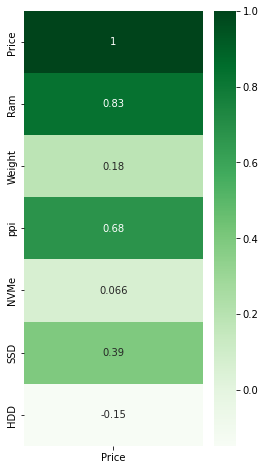

In [1141]:
plt.figure(figsize=(4, 8))
sns.heatmap(df.corr()[["Price"]], annot=True, cmap=plt.cm.Greens)

In [1142]:
df

,Brand,Type,Price,Cpu,ScreenResolution,Ram,Gpu,OpSys,Weight,ppi,NVMe,SSD,HDD
0,Apple,MacBook,122060.0,Apple M1,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8,Apple 7-core GPU Integrated Shared Not Applica...,macOS,1.29,198.185983,0,256,0
1,Asus,ZenBook,130900.0,Intel Core i5,14 inch OLED 2.8K (2880X1800) Touch ScreenYes,8,Intel Iris Xe Graphics Shared,Windows 10,1.40,222.959231,0,512,0
2,Lenovo,Notebook,91000.0,AMD Ryzen 7,"14"" FHD (1920x1080) IPS 250nits Glossy-45% NTS...",8,Integrated AMD Radeon Graphics,Windows 10,1.50,144.618599,512,0,0
3,Asus,Gaming,119000.0,Intel Core i5,"15.6-inch, 400nits FHD (1920 x 1080) 16:9 aspe...",16,Intel Iris Xe Graphics \nNVIDIA GeForce GTX 16...,Windows 10,1.73,141.211998,512,0,0
4,Asus,VivoBook,121520.0,Intel Core i5,15.6 FHD Full HD 1920x1080 Anti-Glare No Not S...,8,Nvidia MX350 Graphics Dedicated 2GB GDDR5,Windows 11,1.80,144.618599,0,512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,Acer,Gaming,188790.0,Intel Core i7,15.6 FHD Full HD 1920x1080 Anti-Glare No 144 H...,16,Nvidia RTX 3060 Graphics Dedicated 6GB GDDR6,Windows 10,2.50,144.618599,0,256,1000
911,Acer,Gaming,188790.0,Intel Core i7,15.6 FHD Full HD 1920x1080 Anti-Glare No 144 H...,16,Nvidia RTX 3060 Graphics Dedicated 6GB GDDR6,Windows 10,2.50,144.618599,0,256,1000
912,Acer,Gaming,198560.0,Intel Core i7,15.6 QHD IPS LED QHD 2560x1440 Matte Display N...,16,Nvidia RTX 3060 Dedicated 6GB GDDR6,Windows 11,2.50,192.824799,0,512,1000
913,Lenovo,Notebook,59680.0,Intel Core i3,14 FHD Full HD 1920x1080 Anti-Glare No 60 Hz S...,8,Intel UHD Graphics Integrated Shared Not Appli...,Free-Dos,1.50,144.618599,0,256,1000


In [1143]:
pd.DataFrame(df["Gpu"].value_counts())

,Gpu
Intel UHD Graphics,69
Intel Iris Xe Graphics,64
Intel UHD Graphics Integrated Shared Not Applicable,61
Intel UHD Graphics Shared,60
Intel Iris Xe Graphics Integrated Shared Not Applicable,45
...,...
Nvidia MX450 Graphics 2GB,1
Intel's Iris Xe Max graphics. Intel's Iris Xe Max graphics was specifically intended for content creators' portable platforms. It's equivalent to Nvidia's MX330 Laptop Graphics,1
Intel Iris Xe Graphics Integrated Shared N/A,1
Intel UHD Graphics Intergrated Shared Not Applicable,1


In [1144]:
def extract_gpu(gpu):
  gpu = gpu.lower()

  if "nvidia" in gpu or "rtx" in gpu or "gtx" in gpu or "geforce" in gpu:
    return "NVIDIA Gpu Card"
  elif "amd" in gpu and "rx" in gpu:
    return "AMD Gpu Card"
  elif "amd" in gpu or "radeon" in gpu:
    return "AMD Integrated"
  elif "apple" in gpu or "neural engine" in gpu or "16-core" in gpu or "19-core" in gpu or "8-core" in gpu:
    return "Apple Integrated"
  elif "intel" in gpu or "xe" in gpu or "integrated" in gpu:
    return "Intel Integrated"

<AxesSubplot:>

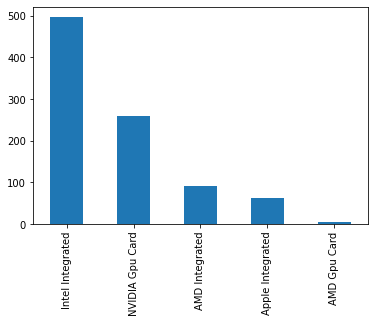

In [1145]:
df["Gpu"].apply(extract_gpu).value_counts().plot(kind="bar")

In [1146]:
df["Gpu"] = df["Gpu"].apply(extract_gpu)

In [1147]:
df

,Brand,Type,Price,Cpu,ScreenResolution,Ram,Gpu,OpSys,Weight,ppi,NVMe,SSD,HDD
0,Apple,MacBook,122060.0,Apple M1,13.3 Retina QHD 2560x1600 Glossy No 60 Hz Slim...,8,Apple Integrated,macOS,1.29,198.185983,0,256,0
1,Asus,ZenBook,130900.0,Intel Core i5,14 inch OLED 2.8K (2880X1800) Touch ScreenYes,8,Intel Integrated,Windows 10,1.40,222.959231,0,512,0
2,Lenovo,Notebook,91000.0,AMD Ryzen 7,"14"" FHD (1920x1080) IPS 250nits Glossy-45% NTS...",8,AMD Integrated,Windows 10,1.50,144.618599,512,0,0
3,Asus,Gaming,119000.0,Intel Core i5,"15.6-inch, 400nits FHD (1920 x 1080) 16:9 aspe...",16,NVIDIA Gpu Card,Windows 10,1.73,141.211998,512,0,0
4,Asus,VivoBook,121520.0,Intel Core i5,15.6 FHD Full HD 1920x1080 Anti-Glare No Not S...,8,NVIDIA Gpu Card,Windows 11,1.80,144.618599,0,512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,Acer,Gaming,188790.0,Intel Core i7,15.6 FHD Full HD 1920x1080 Anti-Glare No 144 H...,16,NVIDIA Gpu Card,Windows 10,2.50,144.618599,0,256,1000
911,Acer,Gaming,188790.0,Intel Core i7,15.6 FHD Full HD 1920x1080 Anti-Glare No 144 H...,16,NVIDIA Gpu Card,Windows 10,2.50,144.618599,0,256,1000
912,Acer,Gaming,198560.0,Intel Core i7,15.6 QHD IPS LED QHD 2560x1440 Matte Display N...,16,NVIDIA Gpu Card,Windows 11,2.50,192.824799,0,512,1000
913,Lenovo,Notebook,59680.0,Intel Core i3,14 FHD Full HD 1920x1080 Anti-Glare No 60 Hz S...,8,Intel Integrated,Free-Dos,1.50,144.618599,0,256,1000


In [1148]:
df["TouchScreen"] = df["ScreenResolution"].apply(lambda x : 1 if "touch screenyes" in x.lower() else 0)

In [1149]:
df["IPS"] = df["ScreenResolution"].apply(lambda x : 1 if "ips" in x.lower() else 0)

In [1150]:
df.drop(["ScreenResolution"], axis=1, inplace=True)

In [1151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        915 non-null    object 
 1   Type         915 non-null    object 
 2   Price        915 non-null    float64
 3   Cpu          915 non-null    object 
 4   Ram          915 non-null    int32  
 5   Gpu          915 non-null    object 
 6   OpSys        915 non-null    object 
 7   Weight       915 non-null    float32
 8   ppi          915 non-null    float64
 9   NVMe         915 non-null    int64  
 10  SSD          915 non-null    int64  
 11  HDD          915 non-null    int64  
 12  TouchScreen  915 non-null    int64  
 13  IPS          915 non-null    int64  
dtypes: float32(1), float64(2), int32(1), int64(5), object(5)
memory usage: 93.1+ KB


<AxesSubplot:>

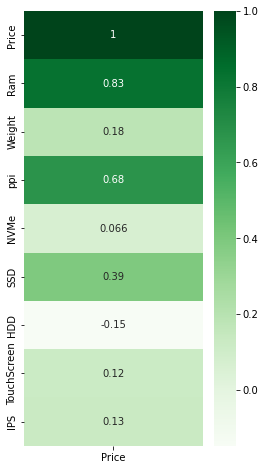

In [1152]:
plt.figure(figsize=(4, 8))
sns.heatmap(df.corr()[["Price"]], annot=True, cmap=plt.cm.Greens)

In [1153]:
df

,Brand,Type,Price,Cpu,Ram,Gpu,OpSys,Weight,ppi,NVMe,SSD,HDD,TouchScreen,IPS
0,Apple,MacBook,122060.0,Apple M1,8,Apple Integrated,macOS,1.29,198.185983,0,256,0,0,0
1,Asus,ZenBook,130900.0,Intel Core i5,8,Intel Integrated,Windows 10,1.40,222.959231,0,512,0,1,0
2,Lenovo,Notebook,91000.0,AMD Ryzen 7,8,AMD Integrated,Windows 10,1.50,144.618599,512,0,0,0,1
3,Asus,Gaming,119000.0,Intel Core i5,16,NVIDIA Gpu Card,Windows 10,1.73,141.211998,512,0,0,0,0
4,Asus,VivoBook,121520.0,Intel Core i5,8,NVIDIA Gpu Card,Windows 11,1.80,144.618599,0,512,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,Acer,Gaming,188790.0,Intel Core i7,16,NVIDIA Gpu Card,Windows 10,2.50,144.618599,0,256,1000,0,1
911,Acer,Gaming,188790.0,Intel Core i7,16,NVIDIA Gpu Card,Windows 10,2.50,144.618599,0,256,1000,0,1
912,Acer,Gaming,198560.0,Intel Core i7,16,NVIDIA Gpu Card,Windows 11,2.50,192.824799,0,512,1000,0,1
913,Lenovo,Notebook,59680.0,Intel Core i3,8,Intel Integrated,Free-Dos,1.50,144.618599,0,256,1000,0,0


---
### visualization...
---

In [1154]:
classes, counts = np.unique(df.Brand, return_counts=True)

classes, counts

(array(['Acer', 'Apple', 'Asus', 'Dell', 'Gigabyte', 'Hp', 'Huawei',
        'Lenovo', 'Msi', 'Toshiba', 'Walton'], dtype=object),
 array([ 86,  65, 380,  75,  19,  78,  13, 128,  46,   6,  19]))

In [1155]:
fig = px.pie(values=counts, names=classes, height=400, width=600)
fig.show()

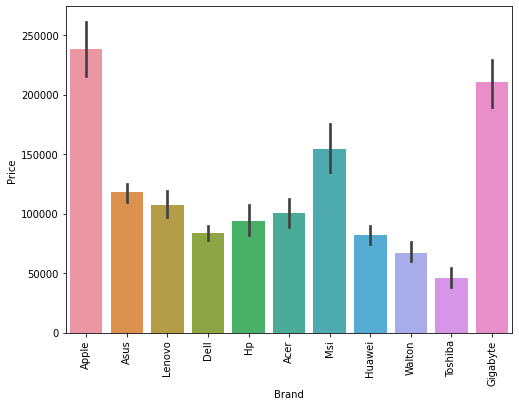

In [1156]:
plt.figure(figsize=(8, 6))
sns.barplot(df["Brand"], df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [1157]:
classes, counts = np.unique(df["Type"], return_counts=True)
classes, counts

fig = px.pie(values=counts, names=classes, height=400, width=600)
fig.show()

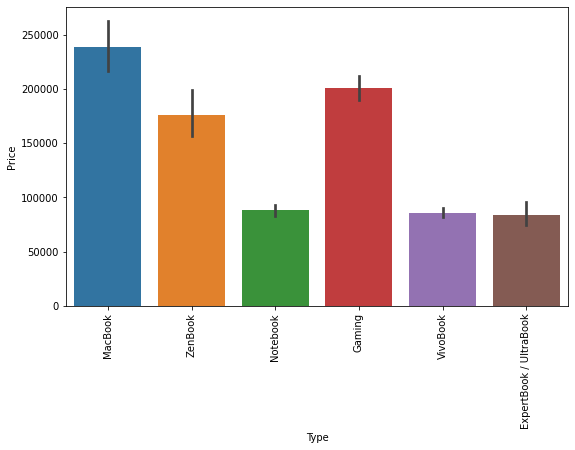

In [1158]:
plt.figure(figsize=(9, 5.5))
sns.barplot(df["Type"], df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [1159]:
df.head()

,Brand,Type,Price,Cpu,Ram,Gpu,OpSys,Weight,ppi,NVMe,SSD,HDD,TouchScreen,IPS
0,Apple,MacBook,122060.0,Apple M1,8,Apple Integrated,macOS,1.29,198.185983,0,256,0,0,0
1,Asus,ZenBook,130900.0,Intel Core i5,8,Intel Integrated,Windows 10,1.40,222.959231,0,512,0,1,0
2,Lenovo,Notebook,91000.0,AMD Ryzen 7,8,AMD Integrated,Windows 10,1.50,144.618599,512,0,0,0,1
3,Asus,Gaming,119000.0,Intel Core i5,16,NVIDIA Gpu Card,Windows 10,1.73,141.211998,512,0,0,0,0
4,Asus,VivoBook,121520.0,Intel Core i5,8,NVIDIA Gpu Card,Windows 11,1.80,144.618599,0,512,0,0,1


In [1160]:
classes, counts = np.unique(df["Cpu"], return_counts=True)
classes, counts

fig = px.pie(values=counts, names=classes, height=400, width=600)
fig.show()

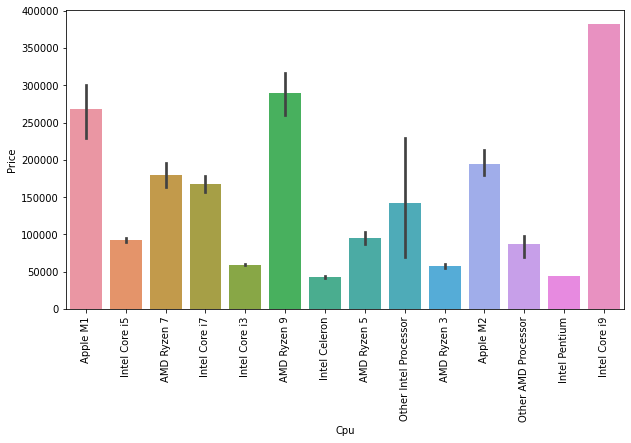

In [1161]:
plt.figure(figsize=(10, 5.5))
sns.barplot(df["Cpu"], df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [1162]:
classes, counts = np.unique(df["Ram"], return_counts=True)
classes, counts

fig = px.pie(values=counts, names=classes, height=400, width=600)
fig.show()

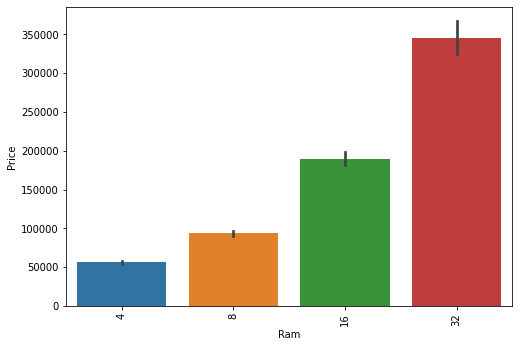

In [1163]:
plt.figure(figsize=(8, 5.5))
sns.barplot(df["Ram"], df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [1164]:
df.head()

,Brand,Type,Price,Cpu,Ram,Gpu,OpSys,Weight,ppi,NVMe,SSD,HDD,TouchScreen,IPS
0,Apple,MacBook,122060.0,Apple M1,8,Apple Integrated,macOS,1.29,198.185983,0,256,0,0,0
1,Asus,ZenBook,130900.0,Intel Core i5,8,Intel Integrated,Windows 10,1.40,222.959231,0,512,0,1,0
2,Lenovo,Notebook,91000.0,AMD Ryzen 7,8,AMD Integrated,Windows 10,1.50,144.618599,512,0,0,0,1
3,Asus,Gaming,119000.0,Intel Core i5,16,NVIDIA Gpu Card,Windows 10,1.73,141.211998,512,0,0,0,0
4,Asus,VivoBook,121520.0,Intel Core i5,8,NVIDIA Gpu Card,Windows 11,1.80,144.618599,0,512,0,0,1


In [1165]:
classes, counts = np.unique(df["Gpu"], return_counts=True)
classes, counts

fig = px.pie(values=counts, names=classes, height=400, width=600)
fig.show()

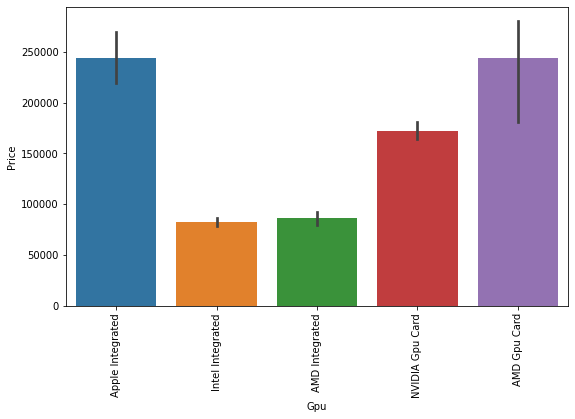

In [1166]:
plt.figure(figsize=(9, 5.5))
sns.barplot(df["Gpu"], df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [1167]:
classes, counts = np.unique(df["OpSys"], return_counts=True)
classes, counts

fig = px.pie(values=counts, names=classes, height=400, width=600)
fig.show()

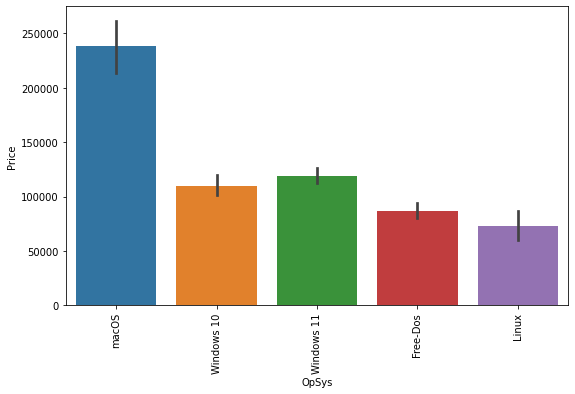

In [1168]:
plt.figure(figsize=(9, 5.5))
sns.barplot(df["OpSys"], df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [1169]:
df["Brand"] = df["Brand"].apply(lambda x : x.lower())
df["Type"] = df["Type"].apply(lambda x : x.lower())
df["Cpu"] = df["Cpu"].apply(lambda x : x.lower())
df["Gpu"] = df["Gpu"].apply(lambda x : x.lower())
df["OpSys"] = df["OpSys"].apply(lambda x : x.lower())

In [1170]:
df.head()

,Brand,Type,Price,Cpu,Ram,Gpu,OpSys,Weight,ppi,NVMe,SSD,HDD,TouchScreen,IPS
0,apple,macbook,122060.0,apple m1,8,apple integrated,macos,1.29,198.185983,0,256,0,0,0
1,asus,zenbook,130900.0,intel core i5,8,intel integrated,windows 10,1.40,222.959231,0,512,0,1,0
2,lenovo,notebook,91000.0,amd ryzen 7,8,amd integrated,windows 10,1.50,144.618599,512,0,0,0,1
3,asus,gaming,119000.0,intel core i5,16,nvidia gpu card,windows 10,1.73,141.211998,512,0,0,0,0
4,asus,vivobook,121520.0,intel core i5,8,nvidia gpu card,windows 11,1.80,144.618599,0,512,0,0,1


<AxesSubplot:xlabel='Weight', ylabel='Price'>

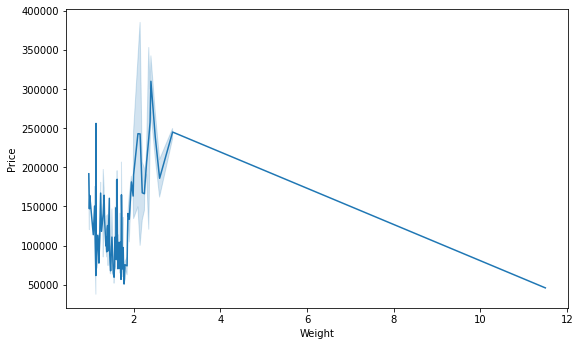

In [1171]:
plt.figure(figsize=(9, 5.5))
sns.lineplot(df["Weight"], df["Price"])

<AxesSubplot:xlabel='ppi', ylabel='Price'>

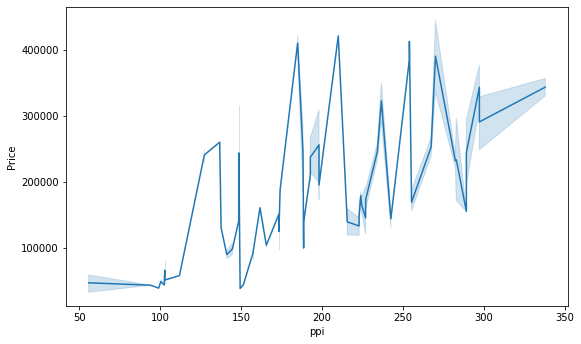

In [1172]:
plt.figure(figsize=(9, 5.5))
sns.lineplot(df["ppi"], df["Price"])

In [1173]:
classes, counts = np.unique(df["TouchScreen"], return_counts=True)
classes, counts

fig = px.pie(values=counts, names=classes, height=400, width=600)
fig.show()

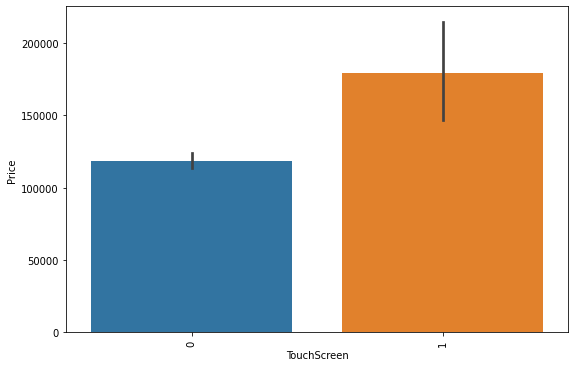

In [1174]:
plt.figure(figsize=(9, 6))
sns.barplot(df["TouchScreen"], df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [1175]:
classes, counts = np.unique(df["IPS"], return_counts=True)
classes, counts

fig = px.pie(values=counts, names=classes, height=400, width=600)
fig.show()

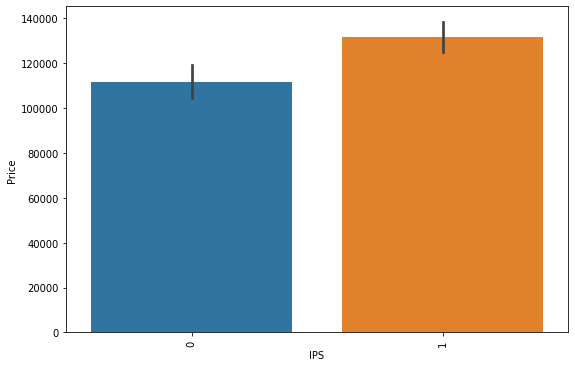

In [1176]:
plt.figure(figsize=(9, 6))
sns.barplot(df["IPS"], df["Price"])
plt.xticks(rotation="vertical")
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

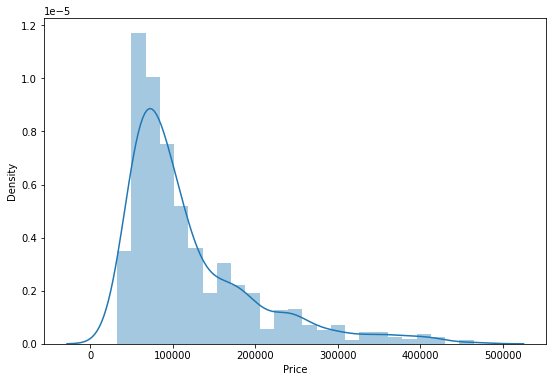

In [1177]:
plt.figure(figsize=(9, 6))
sns.distplot(df["Price"])                     ## it's skewed data, can be fixed by LogScaler

<AxesSubplot:xlabel='Price', ylabel='Density'>

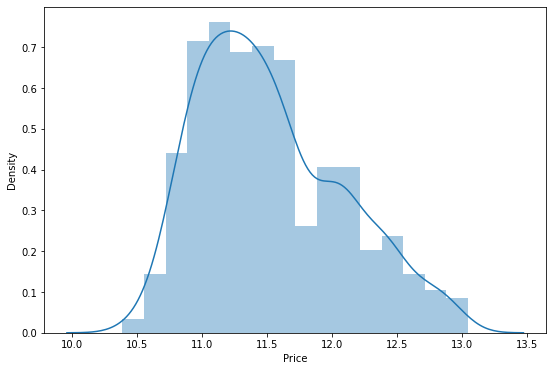

In [1178]:
plt.figure(figsize=(9, 6))
sns.distplot(np.log(df["Price"]))

In [1179]:
x = df.drop("Price", axis=1)
y = np.log(df["Price"])

In [1180]:
x.head()

,Brand,Type,Cpu,Ram,Gpu,OpSys,Weight,ppi,NVMe,SSD,HDD,TouchScreen,IPS
0,apple,macbook,apple m1,8,apple integrated,macos,1.29,198.185983,0,256,0,0,0
1,asus,zenbook,intel core i5,8,intel integrated,windows 10,1.40,222.959231,0,512,0,1,0
2,lenovo,notebook,amd ryzen 7,8,amd integrated,windows 10,1.50,144.618599,512,0,0,0,1
3,asus,gaming,intel core i5,16,nvidia gpu card,windows 10,1.73,141.211998,512,0,0,0,0
4,asus,vivobook,intel core i5,8,nvidia gpu card,windows 11,1.80,144.618599,0,512,0,0,1


In [1181]:
y

0      11.712268
1      11.782189
2      11.418615
3      11.686879
4      11.707834
         ...    
910    12.148391
911    12.148391
912    12.198847
913    10.996752
914    11.023535
Name: Price, Length: 915, dtype: float64

In [1182]:
from sklearn.model_selection import train_test_split

In [1183]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=True, test_size=0.20)

In [1184]:
x_train.shape

(732, 13)

In [1185]:
y_test.shape

(183,)

---
# finally, the MODEL building part..
---
---

---
#### I'll apply OneHot Encoding on the Categorical columns, but one by one it's a tidious task...
---
#### instead I'll use PipeLine and ColumnTransformer and OneHotEncoder from sklearn..

In [1186]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

In [1187]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [1188]:
x.head(2)

,Brand,Type,Cpu,Ram,Gpu,OpSys,Weight,ppi,NVMe,SSD,HDD,TouchScreen,IPS
0,apple,macbook,apple m1,8,apple integrated,macos,1.29,198.185983,0,256,0,0,0
1,asus,zenbook,intel core i5,8,intel integrated,windows 10,1.40,222.959231,0,512,0,1,0


In [1189]:
step1 = ColumnTransformer(transformers=[
    ('col_trans', OneHotEncoder(sparse=False, drop="first"), [0, 1, 2, 4, 5])
], remainder="passthrough")

step1

ColumnTransformer(remainder='passthrough',
                  transformers=[('col_trans',
                                 OneHotEncoder(drop='first', sparse=False),
                                 [0, 1, 2, 4, 5])])

In [1190]:
step2 = LinearRegression()

In [1191]:
from sklearn.pipeline import Pipeline

In [1192]:
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

In [1193]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_trans',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 2, 4, 5])])),
                ('step2', LinearRegression())])

In [1194]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [1195]:
y_pred = pipe.predict(x_test)

In [1196]:
print("Accuracy Rate LR: ", r2_score(y_test, y_pred))
print("MAE LR: ", mean_absolute_error(y_test, y_pred))
print("MSE LR: ", mean_squared_error(y_test, y_pred))

Accuracy Rate LR:  0.9390949420735296
MAE LR:  0.10447334191182046
MSE LR:  0.0176894737256365


In [1197]:
np.exp(0.10446734753418464)                     ## only 1.12 BDT (taka) difference, sounds quite good.. 8-)

1.110119145146977

---
### Linear Regression test:
---

In [1198]:
step1 = ColumnTransformer(transformers=[
    ('col_trans', OneHotEncoder(sparse=False, drop="first"), [0, 1, 2, 4, 5])
], remainder="passthrough")

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("Accuracy Rate LR: ", r2_score(y_test, y_pred))
print("MAE LR: ", mean_absolute_error(y_test, y_pred))
print("MSE LR: ", mean_squared_error(y_test, y_pred))

Accuracy Rate LR:  0.9390949420735296
MAE LR:  0.10447334191182046
MSE LR:  0.0176894737256365


---
### RandomForest Regressor:
---

In [1199]:
step1 = ColumnTransformer(transformers=[
    ('col_trans', OneHotEncoder(sparse=False, drop="first"), [0, 1, 2, 4, 5])
], remainder="passthrough")

step2 = RandomForestRegressor()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("Accuracy Rate LR: ", r2_score(y_test, y_pred))
print("MAE LR: ", mean_absolute_error(y_test, y_pred))
print("MSE LR: ", mean_squared_error(y_test, y_pred))

Accuracy Rate LR:  0.9506683592667458
MAE LR:  0.07667581135432883
MSE LR:  0.014328050777769174


---
### XGboost Regressor:
---

In [1200]:
step1 = ColumnTransformer(transformers=[
    ('col_trans', OneHotEncoder(sparse=False, drop="first"), [0, 1, 2, 4, 5])
], remainder="passthrough")

step2 = XGBRegressor() 

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("Accuracy Rate LR: ", r2_score(y_test, y_pred))
print("MAE LR: ", mean_absolute_error(y_test, y_pred))
print("MSE LR: ", mean_squared_error(y_test, y_pred))

Accuracy Rate LR:  0.9611403139799888
MAE LR:  0.06718790589289685
MSE LR:  0.011286540366932536


---
### Extratrees Regressor
---

In [1201]:
step1 = ColumnTransformer(transformers=[
    ('col_trans', OneHotEncoder(sparse=False, drop="first"), [0, 1, 2, 4, 5])
], remainder="passthrough")

step2 = ExtraTreesRegressor() 

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("Accuracy Rate LR: ", r2_score(y_test, y_pred))
print("MAE LR: ", mean_absolute_error(y_test, y_pred))
print("MSE LR: ", mean_squared_error(y_test, y_pred))

Accuracy Rate LR:  0.9420186686387604
MAE LR:  0.07844956776948875
MSE LR:  0.01684029656338775


---
### DecisionTree Regressor
---

In [1202]:
step1 = ColumnTransformer(transformers=[
    ('col_trans', OneHotEncoder(sparse=False, drop="first"), [0, 1, 2, 4, 5])
], remainder="passthrough")

step2 = DecisionTreeRegressor() 

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("Accuracy Rate LR: ", r2_score(y_test, y_pred))
print("MAE LR: ", mean_absolute_error(y_test, y_pred))
print("MSE LR: ", mean_squared_error(y_test, y_pred))

Accuracy Rate LR:  0.8741620796087927
MAE LR:  0.11376733829890624
MSE LR:  0.036548796803319995


---
### AdaBoost Regressor
---

In [1203]:
step1 = ColumnTransformer(transformers=[
    ('col_trans', OneHotEncoder(sparse=False, drop="first"), [0, 1, 2, 4, 5])
], remainder="passthrough")

step2 = AdaBoostRegressor() 

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("Accuracy Rate LR: ", r2_score(y_test, y_pred))
print("MAE LR: ", mean_absolute_error(y_test, y_pred))
print("MSE LR: ", mean_squared_error(y_test, y_pred))

Accuracy Rate LR:  0.8734676243324013
MAE LR:  0.15867504742191027
MSE LR:  0.03675049677346345


---
### KNN Regressor
---

In [1204]:
step1 = ColumnTransformer(transformers=[
    ('col_trans', OneHotEncoder(sparse=False, drop="first"), [0, 1, 2, 4, 5])
], remainder="passthrough")

step2 = KNeighborsRegressor() 

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("Accuracy Rate LR: ", r2_score(y_test, y_pred))
print("MAE LR: ", mean_absolute_error(y_test, y_pred))
print("MSE LR: ", mean_squared_error(y_test, y_pred))

Accuracy Rate LR:  0.8542018208849043
MAE LR:  0.16086165016037568
MSE LR:  0.04234612274428546


### so, *LinearRegression, RandomForest, XgBoost and ExtraTrees* performing massively well on this data...
----

In [1205]:
from sklearn.ensemble import VotingRegressor

---
### Voting Regression: combination of all well-performing models
---

In [1206]:
step1 = ColumnTransformer(transformers=[
    ('col_trans', OneHotEncoder(sparse=False, drop="first"), [0, 1, 2, 4, 5])
], remainder="passthrough")

step2 = VotingRegressor(estimators=[('xGr', XGBRegressor()), ('rFr', RandomForestRegressor()), ('eXr', ExtraTreesRegressor()), ('lr', LinearRegression())]) 

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("Accuracy Rate LR: ", r2_score(y_test, y_pred))
print("MAE LR: ", mean_absolute_error(y_test, y_pred))
print("MSE LR: ", mean_squared_error(y_test, y_pred))

Accuracy Rate LR:  0.9665354355164328
MAE LR:  0.067166082674625
MSE LR:  0.009719562780592144


In [1207]:
## not a significant improvement than XgBoost, hence we can take XgBoost Regressor as the final best Model here....... 8)

---
## final Model XGboost:   (incredible Accuracy Rate I've ever found..!!)  8)
---

In [1208]:
## final Model XGboost:

step1_final = ColumnTransformer(transformers=[
    ('col_trans', OneHotEncoder(sparse=False, drop="first"), [0, 1, 2, 4, 5])
], remainder="passthrough")

step2_final = XGBRegressor() 

pipe_final_model = Pipeline([
    ('step1', step1_final),
    ('step2', step2_final)
])

pipe_final_model.fit(x_train, y_train)

y_pred = pipe_final_model.predict(x_test)

print("Accuracy Rate LR: ", r2_score(y_test, y_pred))
print("MAE LR: ", mean_absolute_error(y_test, y_pred))
print("MSE LR: ", mean_squared_error(y_test, y_pred))

Accuracy Rate LR:  0.9611403139799888
MAE LR:  0.06718790589289685
MSE LR:  0.011286540366932536


In [1209]:
print("Price Actual    :", np.exp(y[10]))
print("Price Predicted :", np.exp(pipe_final_model.predict([x.iloc[10].values]))[0])

Price Actual    : 249549.9999999999
Price Predicted : 249441.11


In [1210]:
print("Price Actual    :", np.exp(y[0]))
print("Price Predicted :", np.exp(pipe_final_model.predict([x.iloc[0].values]))[0])

Price Actual    : 122059.99999999991
Price Predicted : 122134.734


In [1211]:
print("Price Actual    :", np.exp(y[100]))
print("Price Predicted :", np.exp(pipe_final_model.predict([x.iloc[100].values]))[0])

Price Actual    : 130199.9999999999
Price Predicted : 130585.96


In [1213]:
np.exp(pipe_final_model.predict([['acer', 'notebook', 'intel core i3', 4, 'intel integrated',
      'linux', 1.63, 144.61859931727503, 0, 256, 1000, 0, 1]]))

array([60822.18], dtype=float32)

In [1214]:
x.head()

,Brand,Type,Cpu,Ram,Gpu,OpSys,Weight,ppi,NVMe,SSD,HDD,TouchScreen,IPS
0,apple,macbook,apple m1,8,apple integrated,macos,1.29,198.185983,0,256,0,0,0
1,asus,zenbook,intel core i5,8,intel integrated,windows 10,1.40,222.959231,0,512,0,1,0
2,lenovo,notebook,amd ryzen 7,8,amd integrated,windows 10,1.50,144.618599,512,0,0,0,1
3,asus,gaming,intel core i5,16,nvidia gpu card,windows 10,1.73,141.211998,512,0,0,0,0
4,asus,vivobook,intel core i5,8,nvidia gpu card,windows 11,1.80,144.618599,0,512,0,0,1


In [1215]:
np.exp(pipe_final_model.predict([['lenovo', 'notebook', 'amd ryzen 7', 8, "amd integrated", "windows 10", 1.5, 157.3505121487356, 512, 0, 0, 1, 1]]))[0]

95798.484

---
## saving Model:
---
---

In [1216]:
from pickle import load, dump

In [1217]:
dump(pipe_final_model, open('pipe_final_model.bin', 'wb'))

In [1218]:
x["OpSys"].unique()

array(['macos', 'windows 10', 'windows 11', 'free-dos', 'linux'],
      dtype=object)

In [1219]:
x

,Brand,Type,Cpu,Ram,Gpu,OpSys,Weight,ppi,NVMe,SSD,HDD,TouchScreen,IPS
0,apple,macbook,apple m1,8,apple integrated,macos,1.29,198.185983,0,256,0,0,0
1,asus,zenbook,intel core i5,8,intel integrated,windows 10,1.40,222.959231,0,512,0,1,0
2,lenovo,notebook,amd ryzen 7,8,amd integrated,windows 10,1.50,144.618599,512,0,0,0,1
3,asus,gaming,intel core i5,16,nvidia gpu card,windows 10,1.73,141.211998,512,0,0,0,0
4,asus,vivobook,intel core i5,8,nvidia gpu card,windows 11,1.80,144.618599,0,512,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,acer,gaming,intel core i7,16,nvidia gpu card,windows 10,2.50,144.618599,0,256,1000,0,1
911,acer,gaming,intel core i7,16,nvidia gpu card,windows 10,2.50,144.618599,0,256,1000,0,1
912,acer,gaming,intel core i7,16,nvidia gpu card,windows 11,2.50,192.824799,0,512,1000,0,1
913,lenovo,notebook,intel core i3,8,intel integrated,free-dos,1.50,144.618599,0,256,1000,0,0
